In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
import gseapy as gp
import drug2cell as d2c
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu
from itertools import combinations
import statsmodels.stats.multitest as smm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc



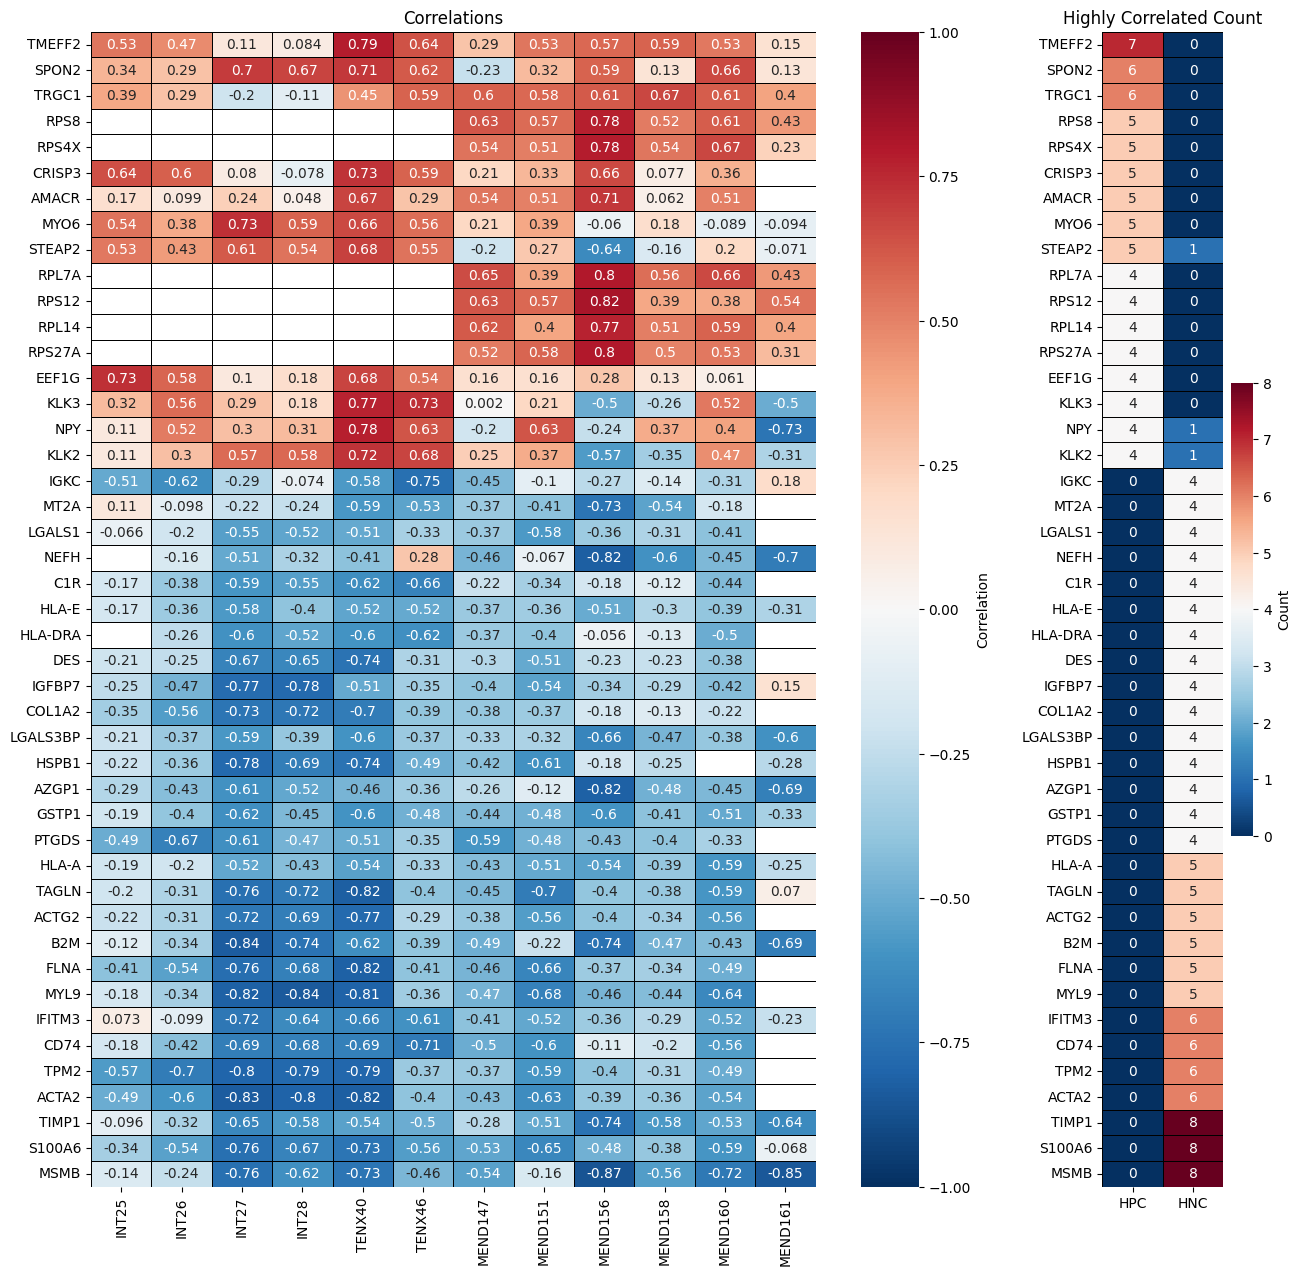

In [2]:
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
threshold = 0.5
result_df = None
top_genes = 45
name_HPC = "HPC"
name_HNC = "HNC"

for sample in samples:
    data = pd.read_csv('MyPaths/GenesDrugsAllSpots/RemoveTrueTrue/' + sample + '_summary_Genes_AllSpotsPseudotime.csv', index_col = 0)
    data.index = data['gene'].values

    temp_df = data[['score']].rename(columns={'score': sample})
    if result_df is None:
            result_df = temp_df
    else:
        result_df = result_df.join(temp_df, how='outer')

result_df['Average'] = result_df.mean(axis=1)
result_df[name_HPC] = result_df.drop(columns='Average').gt(threshold).sum(axis=1)
result_df[name_HNC] = result_df.drop(columns='Average').lt(-threshold).sum(axis=1)
result_df['NewRank'] = result_df[name_HPC] - result_df[name_HNC]

result_df['HighCorr'] = result_df[[name_HPC, name_HNC]].max(axis=1)

result_df_sorted = result_df.sort_values(by=['HighCorr','Average'], ascending=False, key = abs)[:top_genes]
result_df_sorted = result_df_sorted.sort_values(by=['NewRank',name_HPC,'Average',name_HNC], ascending=[False,False,False,True])
result_df_sorted = result_df_sorted.drop(columns=['NewRank','HighCorr','Average']) # ['NewRank','HighCorr'] ['NewRank','HighCorr','Average']

padding_column = pd.Series([np.nan] * len(result_df), name='padding')
result_df_sorted.insert(result_df_sorted.columns.get_loc(name_HPC), 'padding', padding_column)

cols_colormap1 = samples # ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND151','MEND156','MEND158','MEND160','MEND161','Average'] # samples 
cols_colormap2 = [name_HPC, name_HNC]
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15), gridspec_kw={'width_ratios': [len(cols_colormap1), len(cols_colormap2)]})

# Plot the first set of columns with the first colormap
sns.heatmap(result_df_sorted[cols_colormap1],vmin=-1, vmax=1, ax=axes[0], cmap='RdBu_r', annot=True, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlations')

# Plot the second set of columns with the second colormap
sns.heatmap(result_df_sorted[cols_colormap2], ax=axes[1], cmap='RdBu_r', annot=True, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Count'})
axes[1].set_title('Highly Correlated Count')

plt.savefig('SpatialBiomarkers.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [8]:
result_df_sorted.index

Index(['TMEFF2', 'SPON2', 'TRGC1', 'RPS8', 'RPS4X', 'CRISP3', 'AMACR', 'MYO6',
       'STEAP2', 'RPL7A', 'RPS12', 'RPL14', 'RPS27A', 'EEF1G', 'KLK3', 'NPY',
       'KLK2', 'IGKC', 'MT2A', 'LGALS1', 'NEFH', 'C1R', 'HLA-E', 'HLA-DRA',
       'DES', 'IGFBP7', 'COL1A2', 'LGALS3BP', 'HSPB1', 'AZGP1', 'GSTP1',
       'PTGDS', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M', 'FLNA', 'MYL9', 'IFITM3',
       'CD74', 'TPM2', 'ACTA2', 'TIMP1', 'S100A6', 'MSMB'],
      dtype='object')

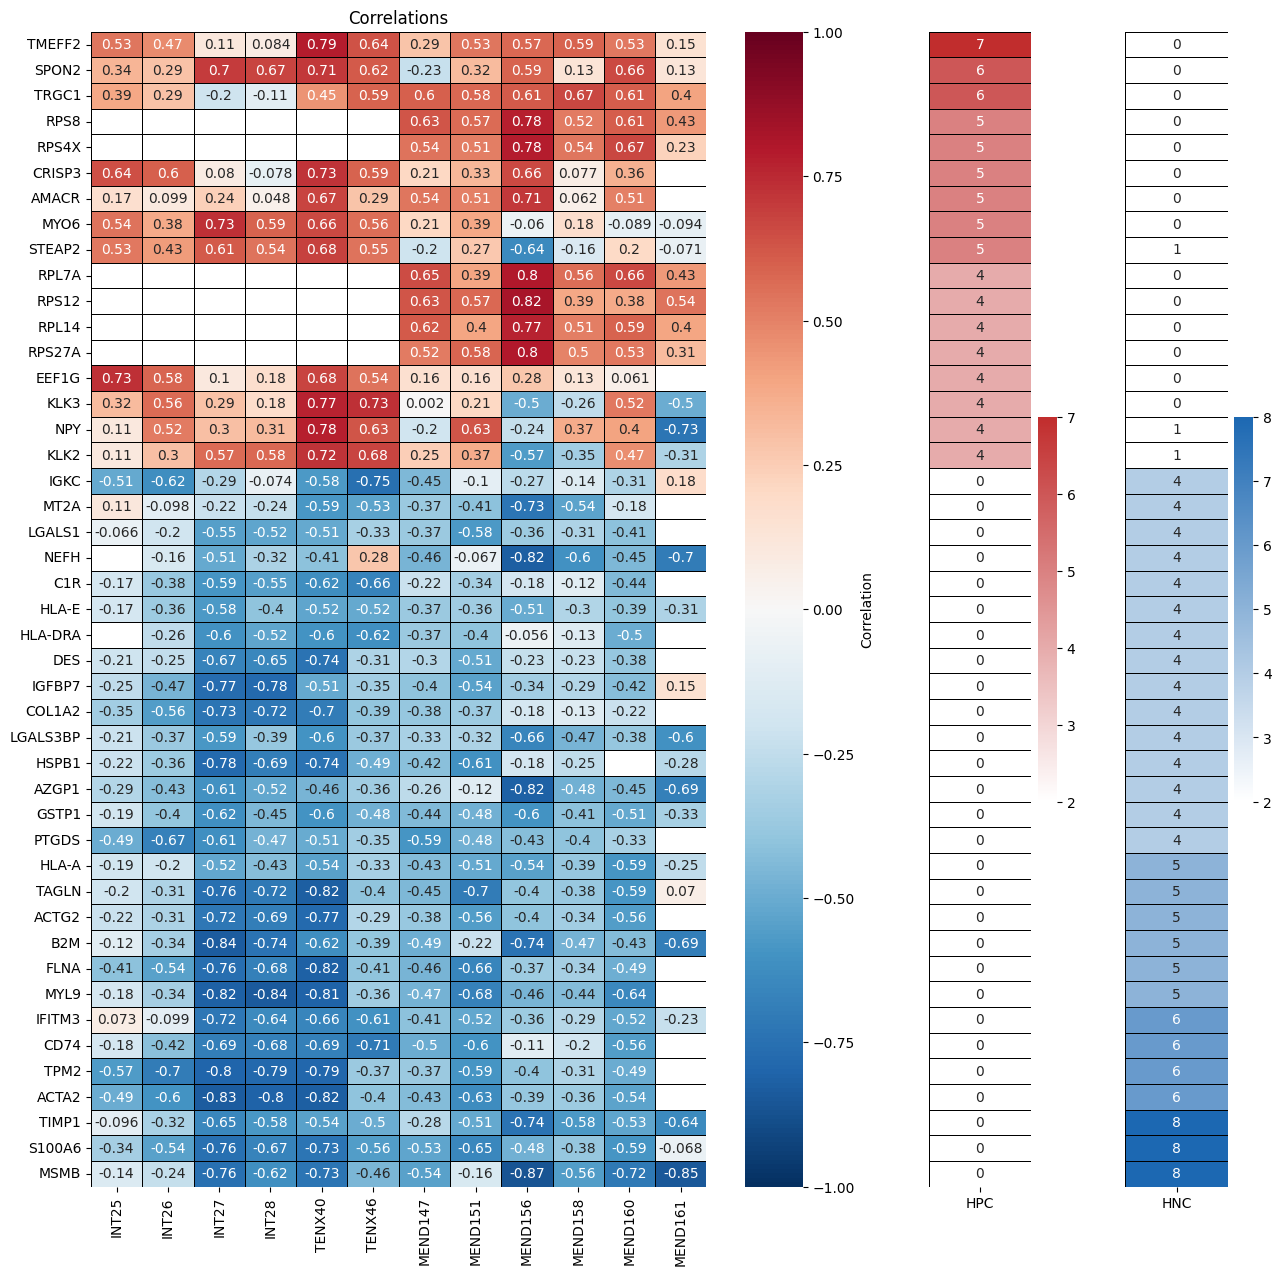

In [3]:
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
threshold = 0.5
result_df = None
top_genes = 45
name_HPC = "HPC"
name_HNC = "HNC"
blue_white_cmap = LinearSegmentedColormap.from_list('blue_white', ['white', "#1c68b2"])
red_white_cmap = LinearSegmentedColormap.from_list('red_white', ['white', "#c12d2d"])

for sample in samples:
    data = pd.read_csv('MyPaths/GenesDrugsAllSpots/RemoveTrueTrue/' + sample + '_summary_Genes_AllSpotsPseudotime.csv', index_col = 0)
    data.index = data['gene'].values

    temp_df = data[['score']].rename(columns={'score': sample})
    if result_df is None:
            result_df = temp_df
    else:
        result_df = result_df.join(temp_df, how='outer')

result_df['Average'] = result_df.mean(axis=1)
result_df[name_HPC] = result_df.drop(columns='Average').gt(threshold).sum(axis=1)
result_df[name_HNC] = result_df.drop(columns='Average').lt(-threshold).sum(axis=1)
result_df['NewRank'] = result_df[name_HPC] - result_df[name_HNC]

result_df['HighCorr'] = result_df[[name_HPC, name_HNC]].max(axis=1)

result_df_sorted = result_df.sort_values(by=['HighCorr','Average'], ascending=False, key = abs)[:top_genes]
result_df_sorted = result_df_sorted.sort_values(by=['NewRank',name_HPC,'Average',name_HNC], ascending=[False,False,False,True])
result_df_sorted = result_df_sorted.drop(columns=['NewRank','HighCorr','Average']) # ['NewRank','HighCorr'] ['NewRank','HighCorr','Average']

padding_column = pd.Series([np.nan] * len(result_df), name='padding')
result_df_sorted.insert(result_df_sorted.columns.get_loc(name_HPC), 'padding', padding_column)

cols_colormap1 = samples # ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND151','MEND156','MEND158','MEND160','MEND161','Average'] # samples 
cols_colormap2 = [name_HPC, name_HNC]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15), gridspec_kw={'width_ratios': [len(cols_colormap1), 2, 2]}) #gridspec_kw={'width_ratios': [len(cols_colormap1), len(cols_colormap2)]}

# Plot the first set of columns with the first colormap
sns.heatmap(result_df_sorted[cols_colormap1],vmin=-1, vmax=1, ax=axes[0], cmap='RdBu_r', annot=True, linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation'})
axes[0].set_title('Correlations')

# Plot the second set of columns with the second colormap
sns.heatmap(result_df_sorted[[name_HPC]], ax=axes[1], cmap=red_white_cmap, annot=True, linewidths=0.5,vmin=2, vmax=7, linecolor='black', yticklabels=False)
sns.heatmap(result_df_sorted[[name_HNC]], ax=axes[2], cmap=blue_white_cmap, annot=True, linewidths=0.5,vmin=2, vmax=8, linecolor='black', yticklabels=False)

plt.savefig('SpatialBiomarkers_specialRanking.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

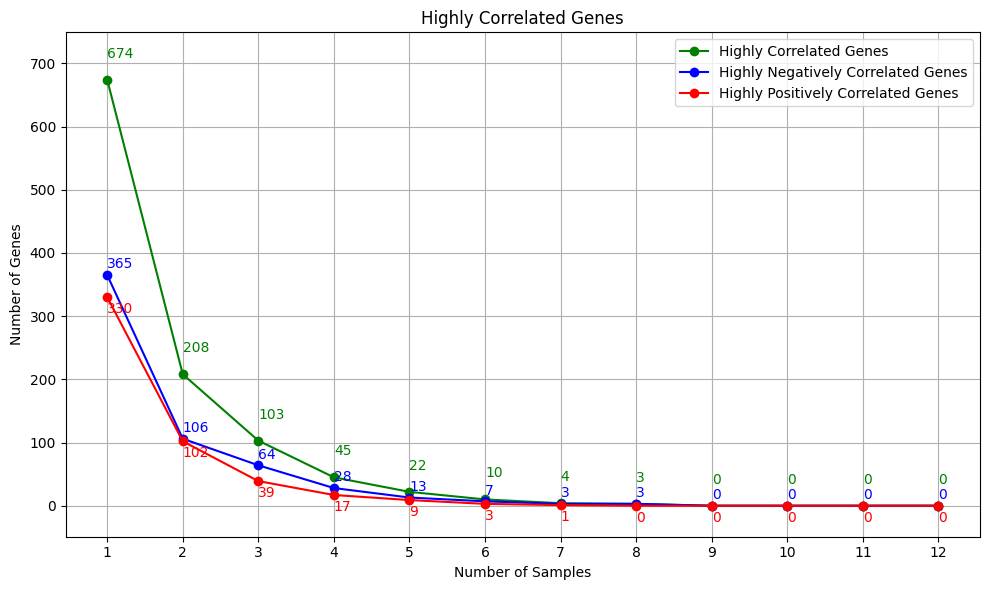

In [47]:
# ThesearethegoodplotsMartin
# NO MEND154
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
colorHC = "green" # "blue" # "green"
colorHPC = "red" # "skyblue" # "blue"
colorHNC = "blue" #"lightblue" # "red"
label_HC = 'Highly Correlated Genes' # "HC"
label_HPC = 'Highly Positively Correlated Genes' #"HPC"
label_HNC = 'Highly Negatively Correlated Genes' #"HNC"

threshold = 0.5
result_df = None

for sample in samples:
    data = pd.read_csv('MyPaths/GenesDrugsAllSpots/RemoveTrueTrue/' + sample + '_summary_Genes_AllSpotsPseudotime.csv', index_col = 0)
    data.index = data['gene'].values

    temp_df = data[['score']].rename(columns={'score': sample})
    if result_df is None:
            result_df = temp_df
    else:
        result_df = result_df.join(temp_df, how='outer')
        
# Step 1: Initialize lists to store counts for each condition
counts_abs = []
counts_greater = []
counts_less = []
k_vals = range(1, (len(samples)+1))

# Step 2: Calculate the counts for each value of k (1 to 11)
for k in k_vals:  # k from 1 to 11
    # Count rows with at least k absolute values > threshold
    count_abs = np.logical_or((result_df > threshold).sum(axis=1) >= k, (result_df < -threshold).sum(axis=1) >= k)
    #count_abs = (result_df.abs() > threshold).sum(axis=1) >= k
    counts_abs.append(count_abs.sum())
    
    # Count rows with at least k values > threshold
    count_greater = (result_df > threshold).sum(axis=1) >= k
    counts_greater.append(count_greater.sum())
    
    # Count rows with at least k values < -threshold
    count_less = (result_df < -threshold).sum(axis=1) >= k
    counts_less.append(count_less.sum())

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot line for absolute values
plt.plot(k_vals, counts_abs, marker='o', linestyle='-', color=colorHC, label=label_HC)

# Plot line for values less than the negative threshold
plt.plot(k_vals, counts_less, marker='o', linestyle='-', color=colorHNC, label=label_HNC)

# Plot line for values greater than the threshold
plt.plot(k_vals, counts_greater, marker='o', linestyle='-', color=colorHPC, label=label_HPC)

# Add titles and labels
plt.xticks(k_vals)  # Set x-ticks for k from 1 to 11
plt.xlabel('Number of Samples')
plt.ylabel('Number of Genes')
plt.title('Highly Correlated Genes')
plt.grid()

# Add value annotations on top of each dot for absolute values
for i, count in enumerate(counts_abs):
    plt.text(i + 1, count + 30, str(count), ha='left', va='bottom', color=colorHC)

# Add value annotations on top of each dot for values greater than the threshold
for i, count in enumerate(counts_greater):
    plt.text(i + 1, count -30, str(count), ha='left', va='bottom', color=colorHPC)

# Add value annotations on top of each dot for values less than the negative threshold
for i, count in enumerate(counts_less):
    plt.text(i + 1, count +6, str(count), ha='left', va='bottom', color=colorHNC)

# Add a legend to distinguish the lines
plt.legend()
plt.ylim(bottom=-49, top = 749)

plt.tight_layout()
plt.savefig('HCgenes_counts.png', dpi=300, bbox_inches='tight')
plt.show()

# Explanation plot: 
# If using: count_abs = (result_df.abs() > threshold).sum(axis=1) >= k 
# Note that the sum of HPC genes + HNC genes does not equal all the HC genes. This is because some genes can be HPC in
# one sample, but HNC in a different one, making that HPC + HNC > HCG. Additionally some genes might appear as HC for k samples, but not
# appear as HPC nor HNC for k samples (for example gene HPC for k-1 samples and HNC for 1 sample would appear as HC for k samples) making
# HPC + HNC < HC. 

# Maybe doing:
# count_abs = (result_df > threshold).sum(axis=1) >= k or (result_df < -threshold).sum(axis=1) >= k
# This previoUs line would solve the HPC + HNC < HC "inconsistencies" and would mean that a gene appears as HC for k samples if and only if it 
# appears either as HPC or as HNC for k samples
# 

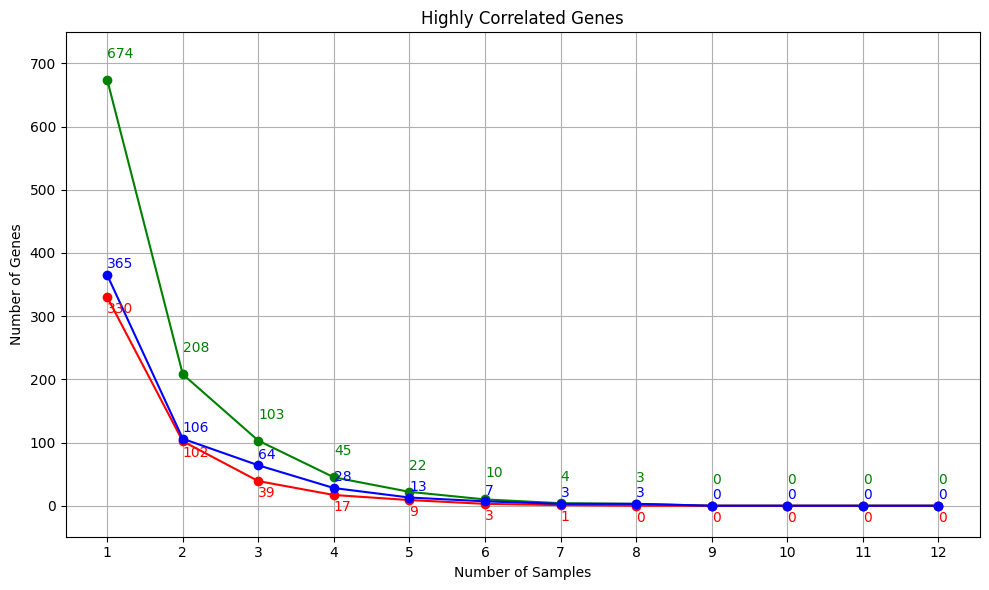

In [45]:
# ThesearethegoodplotsMartin
# NO MEND154
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
colorHC = "green" # "blue" # "green"
colorHPC = "red" # "skyblue" # "blue"
colorHNC = "blue" #"lightblue" # "red"
label_HC = 'Highly Correlated Genes' # "HC"
label_HPC = 'Highly Positively Correlated Genes' #"HPC"
label_HNC = 'Highly Negatively Correlated Genes' #"HNC"

threshold = 0.5
result_df = None

for sample in samples:
    data = pd.read_csv('MyPaths/GenesDrugsAllSpots/RemoveTrueTrue/' + sample + '_summary_Genes_AllSpotsPseudotime.csv', index_col = 0)
    data.index = data['gene'].values

    temp_df = data[['score']].rename(columns={'score': sample})
    if result_df is None:
            result_df = temp_df
    else:
        result_df = result_df.join(temp_df, how='outer')
        
# Step 1: Initialize lists to store counts for each condition
counts_abs = []
counts_greater = []
counts_less = []
k_vals = range(1, (len(samples)+1))

# Step 2: Calculate the counts for each value of k (1 to 11)
for k in k_vals:  # k from 1 to 11
    # Count rows with at least k absolute values > threshold
    count_abs = np.logical_or((result_df > threshold).sum(axis=1) >= k, (result_df < -threshold).sum(axis=1) >= k)
    #count_abs = (result_df.abs() > threshold).sum(axis=1) >= k
    counts_abs.append(count_abs.sum())
    
    # Count rows with at least k values > threshold
    count_greater = (result_df > threshold).sum(axis=1) >= k
    counts_greater.append(count_greater.sum())
    
    # Count rows with at least k values < -threshold
    count_less = (result_df < -threshold).sum(axis=1) >= k
    counts_less.append(count_less.sum())

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot line for absolute values
plt.plot(k_vals, counts_abs, marker='o', linestyle='-', color=colorHC, label=label_HC)

# Plot line for values greater than the threshold
plt.plot(k_vals, counts_greater, marker='o', linestyle='-', color=colorHPC, label=label_HPC)

# Plot line for values less than the negative threshold
plt.plot(k_vals, counts_less, marker='o', linestyle='-', color=colorHNC, label=label_HNC)

# Add titles and labels
plt.xticks(k_vals)  # Set x-ticks for k from 1 to 11
plt.xlabel('Number of Samples')
plt.ylabel('Number of Genes')
plt.title('Highly Correlated Genes')
plt.grid()

# Add value annotations on top of each dot for absolute values
for i, count in enumerate(counts_abs):
    plt.text(i + 1, count + 30, str(count), ha='left', va='bottom', color=colorHC)

# Add value annotations on top of each dot for values greater than the threshold
for i, count in enumerate(counts_greater):
    plt.text(i + 1, count -30, str(count), ha='left', va='bottom', color=colorHPC)

# Add value annotations on top of each dot for values less than the negative threshold
for i, count in enumerate(counts_less):
    plt.text(i + 1, count +6, str(count), ha='left', va='bottom', color=colorHNC)

# Add a legend to distinguish the lines
plt.ylim(bottom=-49, top = 749)

plt.tight_layout()
plt.savefig('HCgenes_counts_nolegend.png', dpi=300, bbox_inches='tight')
plt.show()

# Explanation plot: 
# If using: count_abs = (result_df.abs() > threshold).sum(axis=1) >= k 
# Note that the sum of HPC genes + HNC genes does not equal all the HC genes. This is because some genes can be HPC in
# one sample, but HNC in a different one, making that HPC + HNC > HCG. Additionally some genes might appear as HC for k samples, but not
# appear as HPC nor HNC for k samples (for example gene HPC for k-1 samples and HNC for 1 sample would appear as HC for k samples) making
# HPC + HNC < HC. 

# Maybe doing:
# count_abs = (result_df > threshold).sum(axis=1) >= k or (result_df < -threshold).sum(axis=1) >= k
# This previoUs line would solve the HPC + HNC < HC "inconsistencies" and would mean that a gene appears as HC for k samples if and only if it 
# appears either as HPC or as HNC for k samples
# 

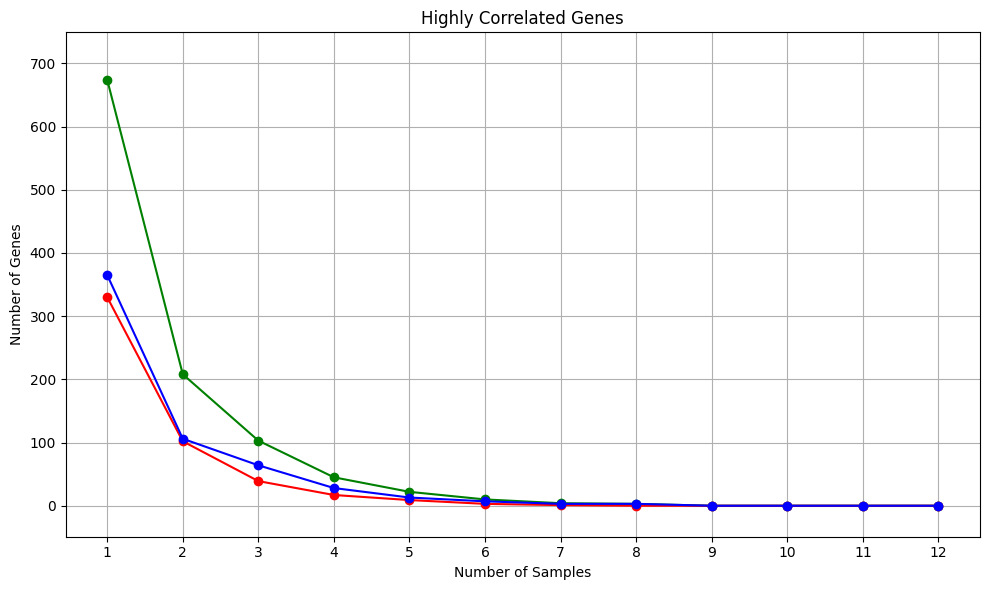

In [48]:
# ThesearethegoodplotsMartin
# NO MEND154
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
colorHC = "green" # "blue" # "green"
colorHPC = "red" # "skyblue" # "blue"
colorHNC = "blue" #"lightblue" # "red"
label_HC = 'Highly Correlated Genes' # "HC"
label_HPC = 'Highly Positively Correlated Genes' #"HPC"
label_HNC = 'Highly Negatively Correlated Genes' #"HNC"

threshold = 0.5
result_df = None

for sample in samples:
    data = pd.read_csv('MyPaths/GenesDrugsAllSpots/RemoveTrueTrue/' + sample + '_summary_Genes_AllSpotsPseudotime.csv', index_col = 0)
    data.index = data['gene'].values

    temp_df = data[['score']].rename(columns={'score': sample})
    if result_df is None:
            result_df = temp_df
    else:
        result_df = result_df.join(temp_df, how='outer')
        
# Step 1: Initialize lists to store counts for each condition
counts_abs = []
counts_greater = []
counts_less = []
k_vals = range(1, (len(samples)+1))
# Step 2: Calculate the counts for each value of k (1 to 11)
for k in k_vals:  # k from 1 to 11
    # Count rows with at least k absolute values > threshold
    count_abs = np.logical_or((result_df > threshold).sum(axis=1) >= k, (result_df < -threshold).sum(axis=1) >= k)
    #count_abs = (result_df.abs() > threshold).sum(axis=1) >= k
    counts_abs.append(count_abs.sum())
    
    # Count rows with at least k values > threshold
    count_greater = (result_df > threshold).sum(axis=1) >= k
    counts_greater.append(count_greater.sum())
    
    # Count rows with at least k values < -threshold
    count_less = (result_df < -threshold).sum(axis=1) >= k
    counts_less.append(count_less.sum())

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot line for absolute values
plt.plot(k_vals, counts_abs, marker='o', linestyle='-', color=colorHC, label=label_HC)

# Plot line for values greater than the threshold
plt.plot(k_vals, counts_greater, marker='o', linestyle='-', color=colorHPC, label=label_HPC)

# Plot line for values less than the negative threshold
plt.plot(k_vals, counts_less, marker='o', linestyle='-', color=colorHNC, label=label_HNC)

# Add titles and labels
plt.xticks(k_vals)  # Set x-ticks for k from 1 to 11
plt.xlabel('Number of Samples')
plt.ylabel('Number of Genes')
plt.title('Highly Correlated Genes')
plt.grid()

# Add a legend to distinguish the lines

plt.ylim(bottom=-49, top = 749)

plt.tight_layout()
plt.savefig('HCgenes_counts_noData.png', dpi=300, bbox_inches='tight')
plt.show()

# Explanation plot: 
# If using: count_abs = (result_df.abs() > threshold).sum(axis=1) >= k 
# Note that the sum of HPC genes + HNC genes does not equal all the HC genes. This is because some genes can be HPC in
# one sample, but HNC in a different one, making that HPC + HNC > HCG. Additionally some genes might appear as HC for k samples, but not
# appear as HPC nor HNC for k samples (for example gene HPC for k-1 samples and HNC for 1 sample would appear as HC for k samples) making
# HPC + HNC < HC. 

# Maybe doing:
# count_abs = (result_df > threshold).sum(axis=1) >= k or (result_df < -threshold).sum(axis=1) >= k
# This previoUs line would solve the HPC + HNC < HC "inconsistencies" and would mean that a gene appears as HC for k samples if and only if it 
# appears either as HPC or as HNC for k samples
# 

In [3]:
# ThesearethegoodplotsMartin
# NO MEND154
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'

result_df = None
for sample in samples:
    data = pd.read_csv(data_path + sample + "_HA_PT.csv", index_col = 0)

    correlation_result = spearmanr(data["Label_orig2"] , data["dpt_pseudotime"])
    temp_df = pd.DataFrame({"Correlation": correlation_result.statistic, "pvalue": correlation_result.pvalue},index= [sample])
    if result_df is None:
        result_df = temp_df
    else:
        result_df = pd.concat([result_df,temp_df])
result_df
        

,Correlation,pvalue
INT25,0.564973,2.046178e-183
INT26,0.530810,4.566291e-145
INT27,0.625768,1.107588e-281
INT28,0.636405,3.518437e-276
TENX40,0.578651,2.129785e-179
TENX46,0.114432,6.333492e-06
MEND147,0.580403,2.178612e-44
MEND151,0.230734,1.034517e-15
MEND156,0.814120,0.000000e+00
MEND158,0.474557,4.382131e-68


In [4]:
correlation_result

SignificanceResult(statistic=0.6566850535857434, pvalue=8.453979357697897e-152)

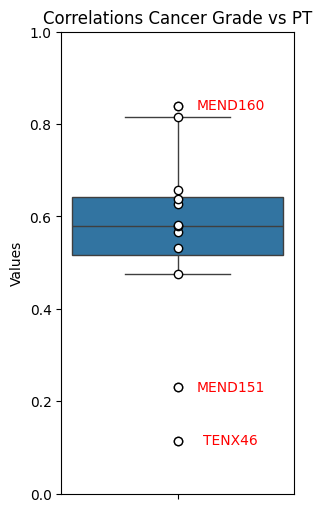

In [5]:
Q1 = result_df['Correlation'].quantile(0.25)
Q3 = result_df['Correlation'].quantile(0.75)
IQR = Q3 - Q1
outliers = result_df[(result_df['Correlation'] < Q1 - 1.5 * IQR) | (result_df['Correlation'] > Q3 + 1.5 * IQR)]

num_points = len(result_df["Correlation"])
colors = plt.cm.tab10(np.linspace(0, 1, num_points))

plt.figure(figsize=(3, 6))
#sns.boxplot(y='Correlation', data=result_df)
#result_df.boxplot(column='Correlation')
box_plot = sns.boxplot(y='Correlation', data=result_df)  # Set fliersize=0 to hide default outliers

# # Remove fill color from the box
# for patch in box_plot.artists:
#     patch.set_edgecolor("black")  # Set outline color
#     patch.set_facecolor("None")   # Remove fill color
    
for idx, value in result_df['Correlation'].items():
    plt.scatter(0, value, facecolor='white', edgecolor='black', zorder=3)  # Plot circles for each point

for idx, row in outliers.iterrows():
    plt.text(0.2, row['Correlation'], f"{idx}", color="red", ha='center', va='center')

plt.title("Correlations Cancer Grade vs PT")
plt.ylabel("Values")
plt.ylim(0,1)
#plt.tight_layout()
plt.savefig("Correlation_CancerGrade_PT.png", dpi=300, bbox_inches='tight')
plt.show()

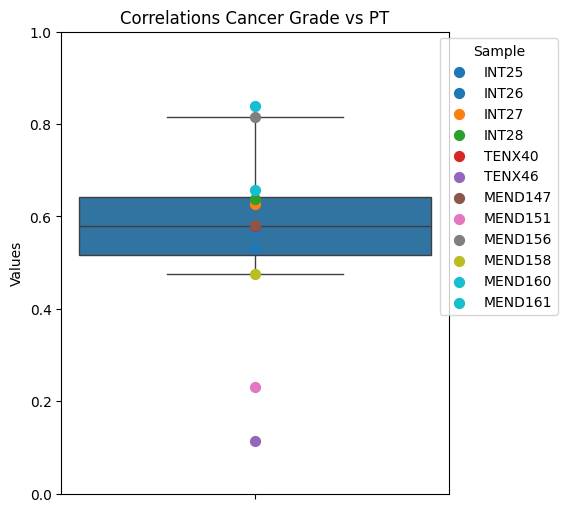

In [6]:
Q1 = result_df['Correlation'].quantile(0.25)
Q3 = result_df['Correlation'].quantile(0.75)
IQR = Q3 - Q1

# Generate a list of unique colors for each data point
num_points = len(result_df)
colors = plt.cm.tab10(np.linspace(0, 1, num_points))  # Using a colormap with enough unique colors

# Plotting the boxplot
plt.figure(figsize=(5, 6))
box_plot = sns.boxplot(y='Correlation', data=result_df, fliersize=0)  # Hide default outlier points

# Remove fill color from the box
for patch in box_plot.artists:
    patch.set_edgecolor("black")  # Set outline color
    patch.set_facecolor("None")   # Remove fill color

# Add each observation as an unfilled circle with a unique color and add them to the legend
for idx, (value, color) in zip(result_df.index, zip(result_df['Correlation'], colors)):
    plt.scatter(0, value, facecolor=color, edgecolor=color, s=50, zorder=3, label=idx)

# Create a legend without duplicate entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Sample", loc="upper right", bbox_to_anchor=(1.3, 1))

# Setting title and labels
plt.title("Correlations Cancer Grade vs PT")
plt.ylabel("Values")
plt.ylim(0, 1)
plt.show()

# CNVs

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


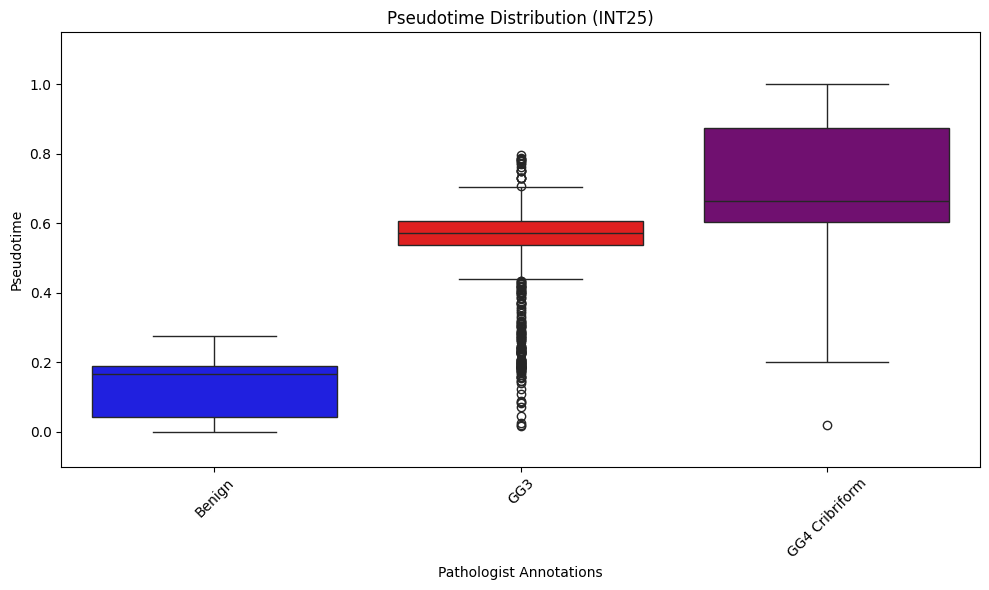

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


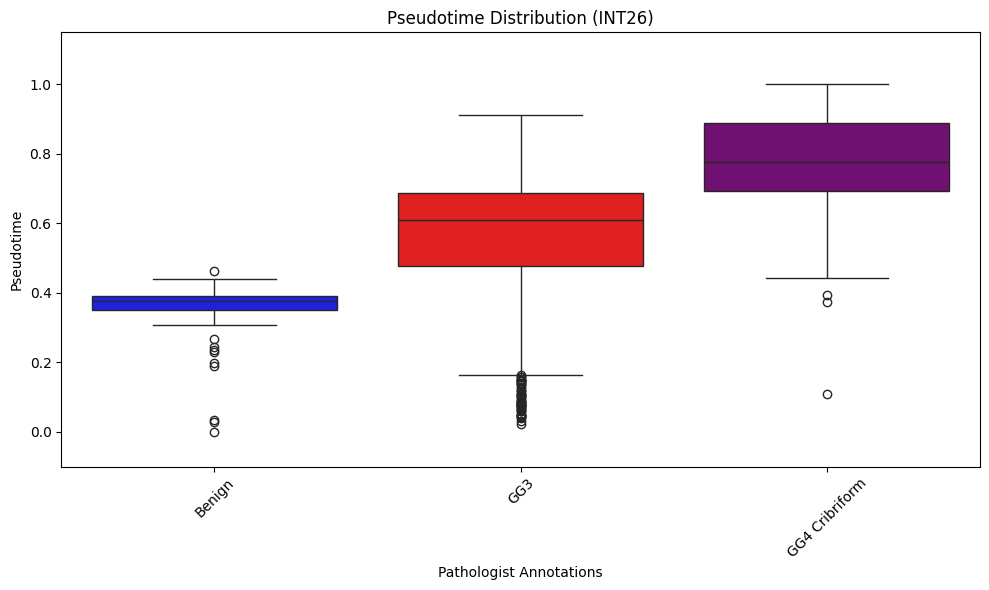

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


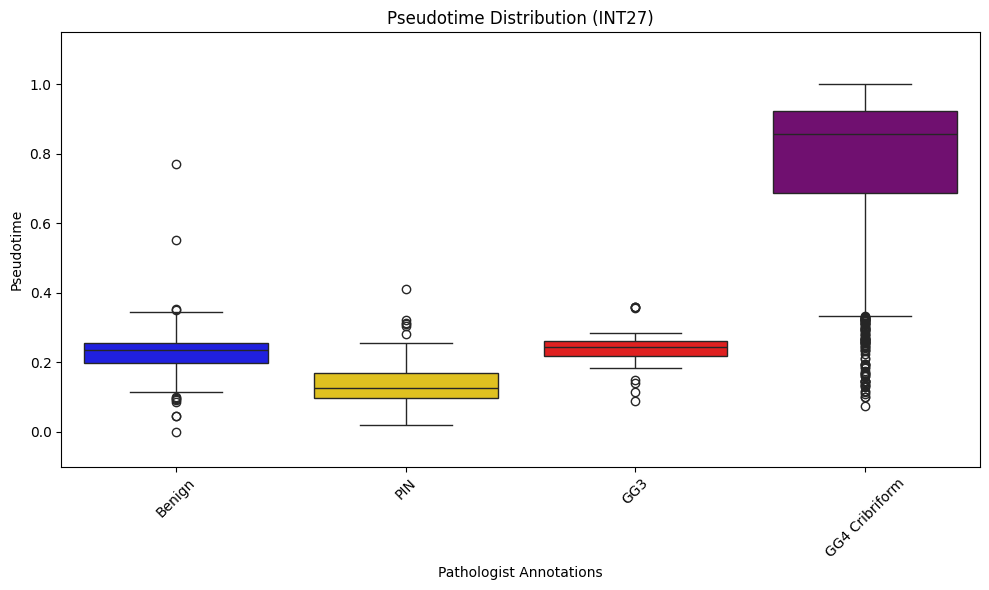

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


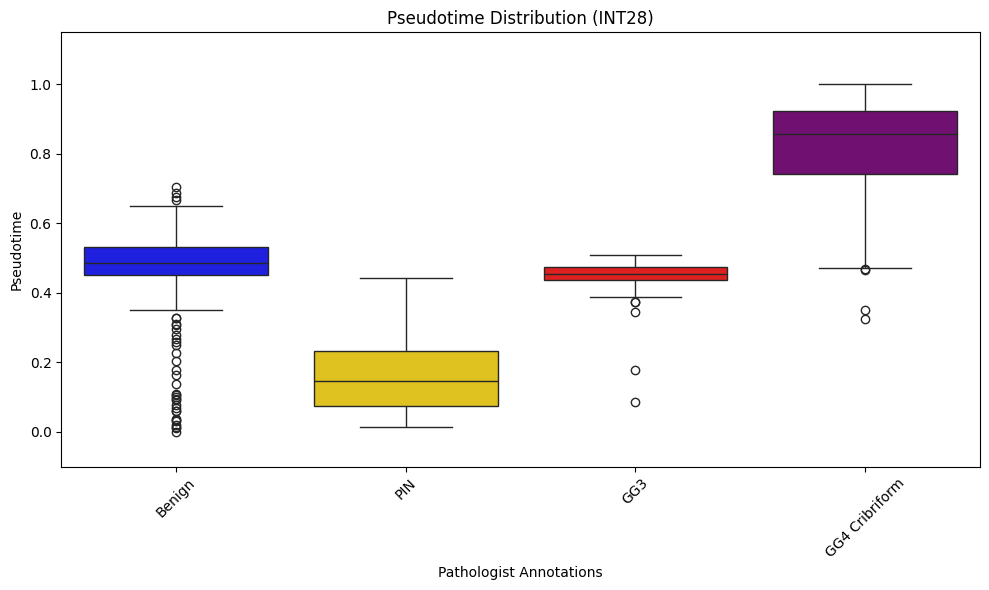

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


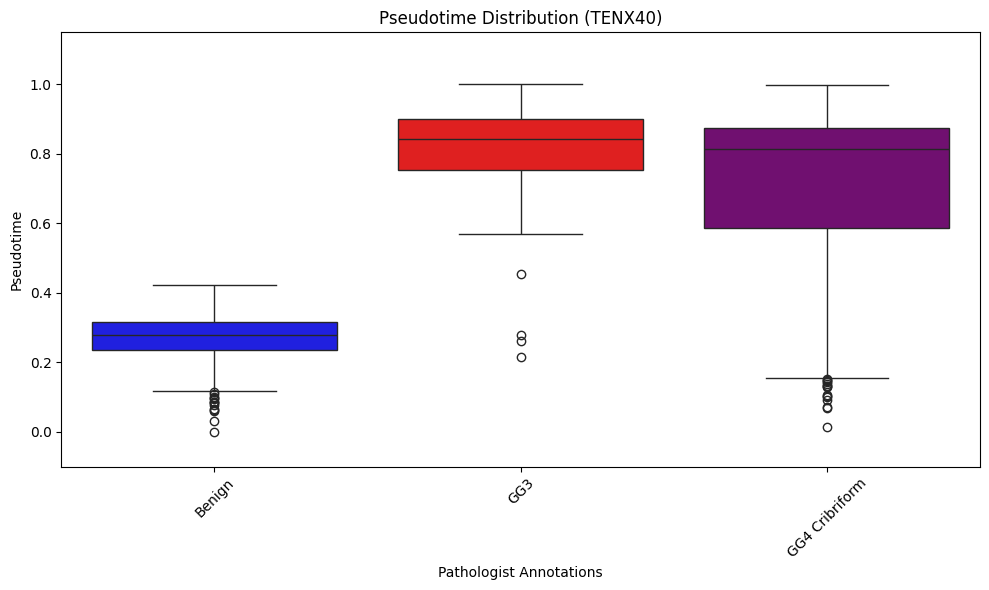

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


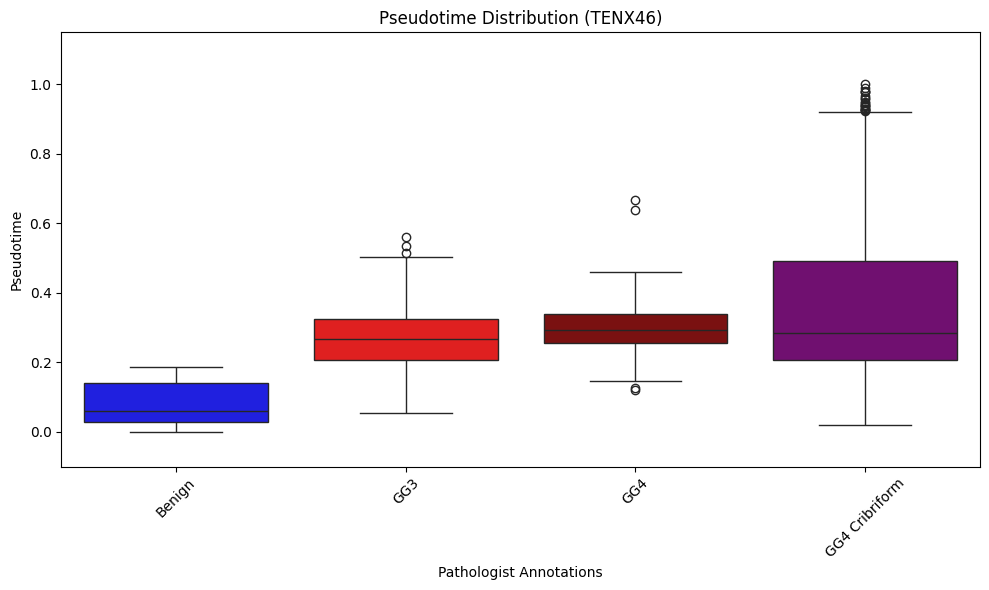

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


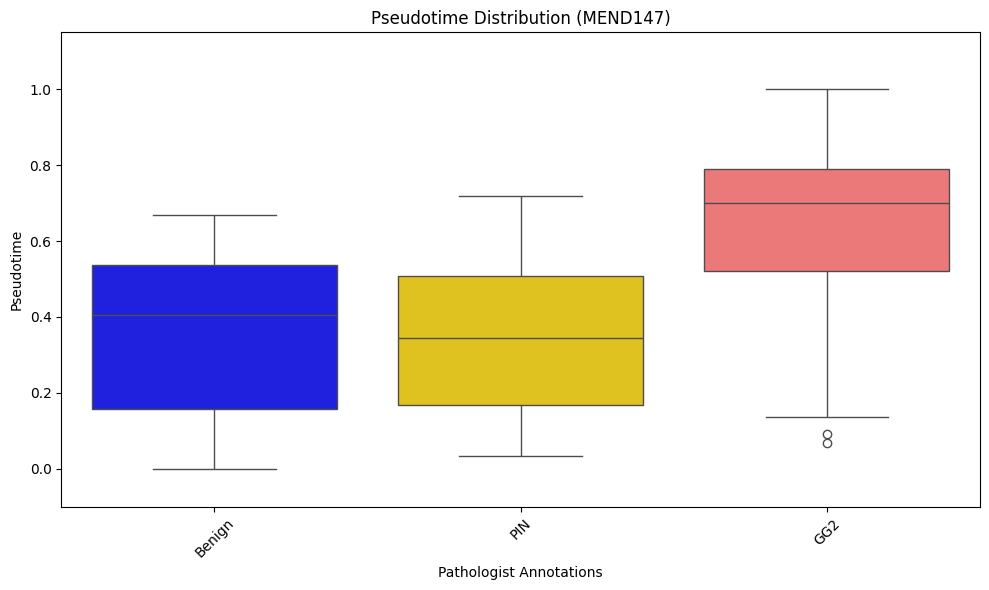

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


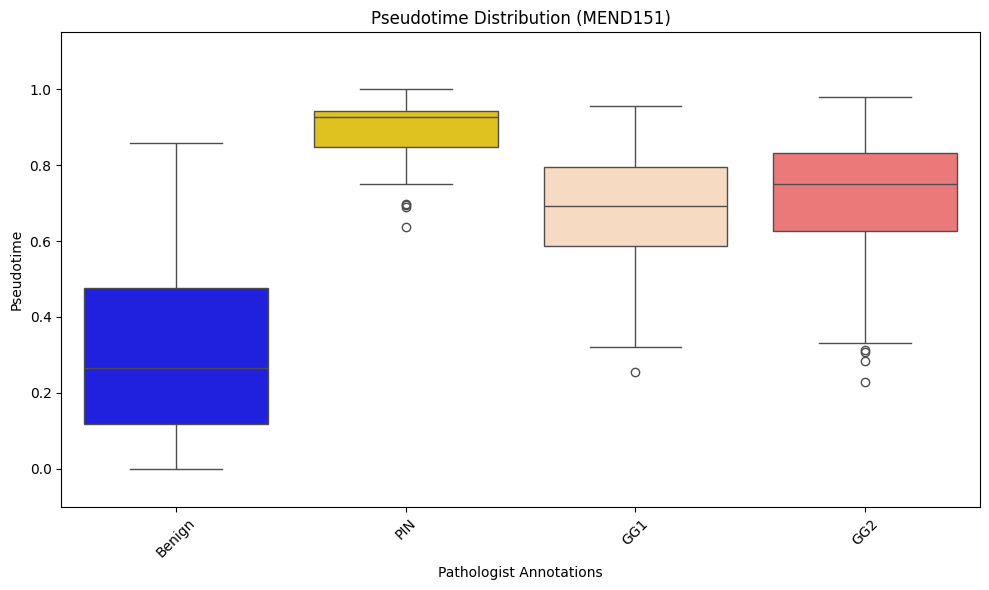

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


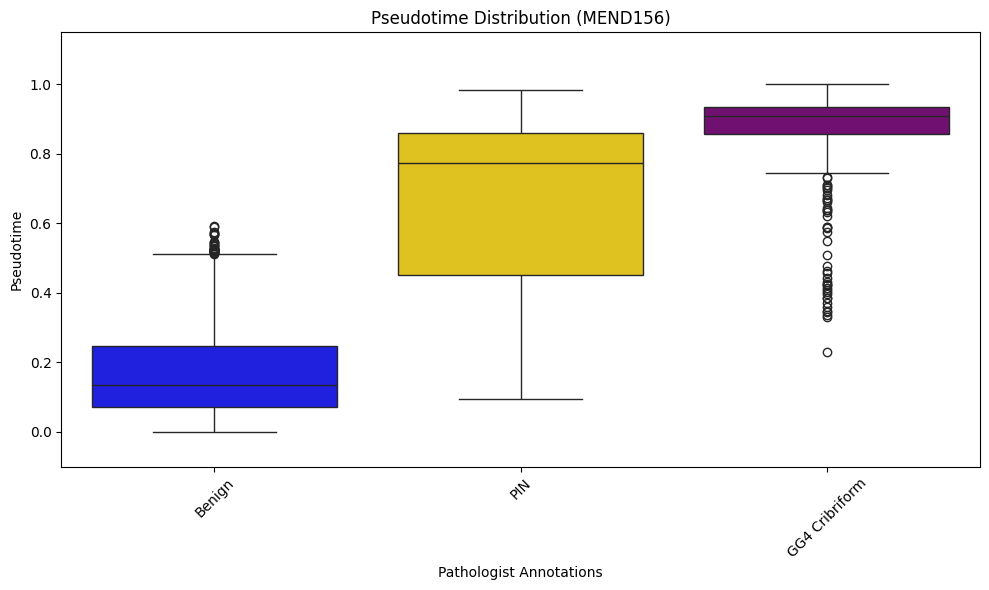

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


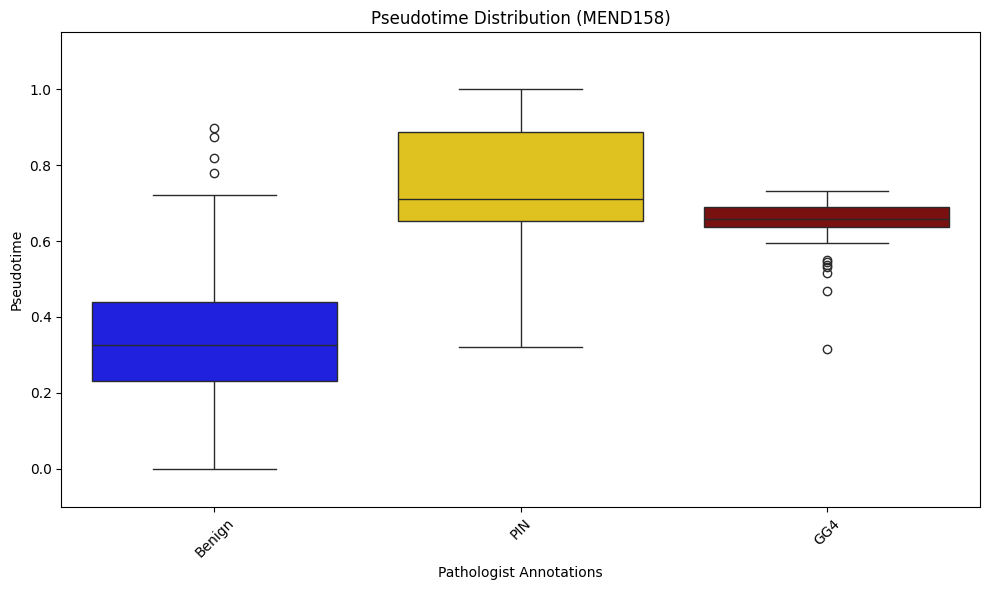

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


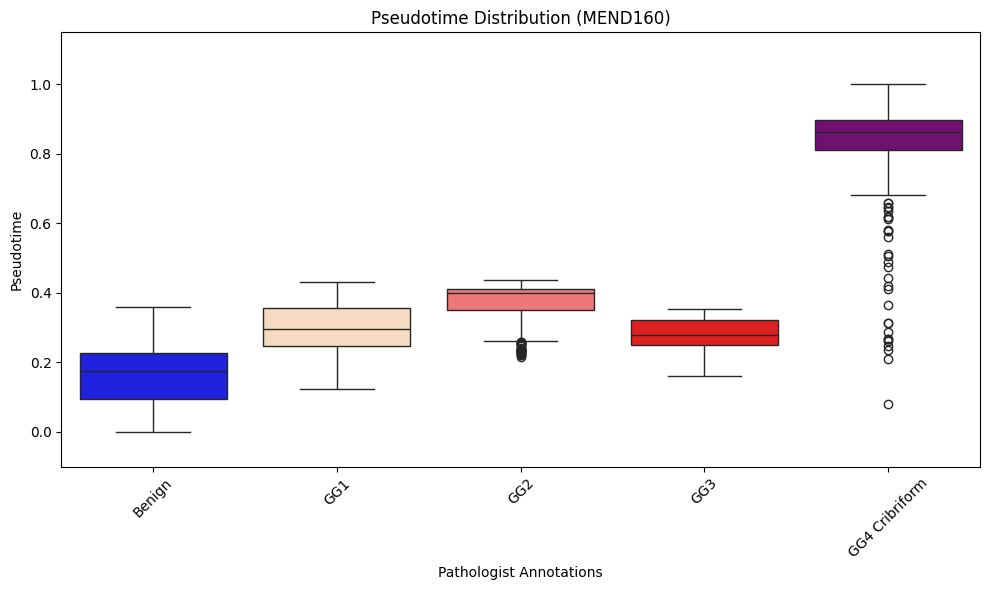

C:\Users\dandia\AppData\Local\Temp\ipykernel_5984\1469724850.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)


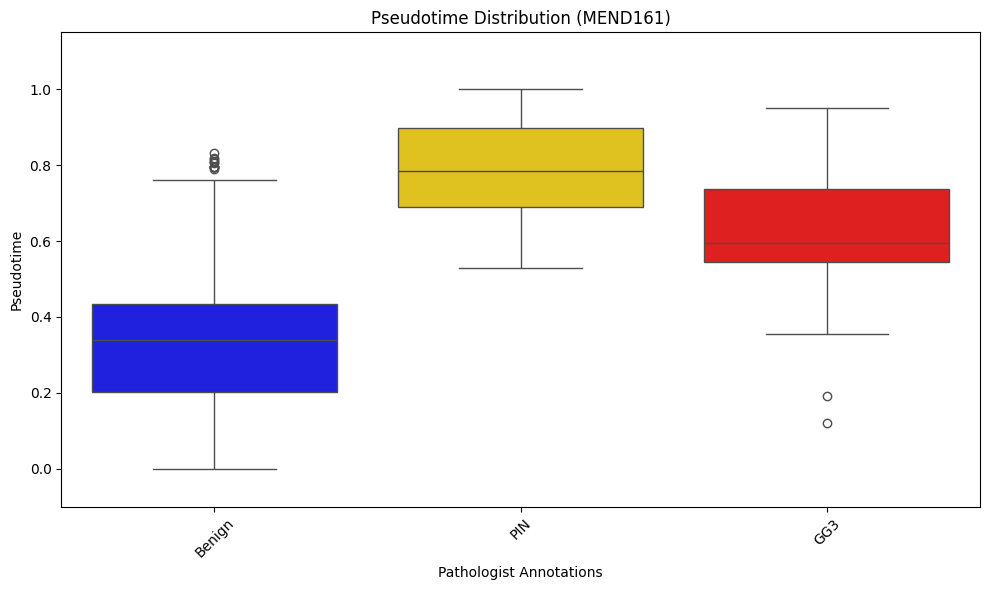

In [14]:
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
color_map = {
    'Benign': 'blue',  # Replace with your actual category name and colors
    'PIN': 'gold',
    'GG1': 'peachpuff',
    'GG2': '#FF6666',
    'GG3': 'red',
    'GG4': 'darkred',
    'GG4 Cribriform': 'purple',
    'Not Labelled': 'gray'
}

category_order = ['Benign', 'PIN', 'GG1', 'GG2', 'GG3', 'GG4', 'GG4 Cribriform', 'Not Labelled']

result_df = None
for sample in samples:
    data = pd.read_csv(data_path + sample + "_HA_PT.csv", index_col = 0)

    label_orig_uniq = data['Label_orig'].unique()
    # Create a custom color map for Label_orig
    custom_color_map = {
        label: color_map[label] for label in label_orig_uniq if label in color_map
    }
    present_categories = [cat for cat in category_order if cat in data['Label_orig'].unique()]
    
    # Create a boxplot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Label_orig', y='dpt_pseudotime', data=data,palette = custom_color_map,order = present_categories)
    
    # Customize the plot
    plt.title('Pseudotime Distribution (' + sample + ")")
    plt.xlabel('Pathologist Annotations')
    plt.ylabel('Pseudotime')
    plt.xticks(rotation=45)
    plt.ylim(-0.10,1.15)
    plt.tight_layout()
    
    plt.savefig(sample + "_Distr_Pt_Pathologist_Annotations.png", dpi=300, bbox_inches='tight')
    # Show the plot
    plt.show()


# CancerGradevsPTvsCNA

In [19]:
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
test_number = {'INT25': "22",
                'INT26': "23",
                'INT27': "21",
                'INT28': "24",
                'TENX40': "25",
                'TENX46': "26",
                'MEND147': "27",
                'MEND151': "19",
                'MEND156': "17",
                'MEND158': "18",
                'MEND160': "16",
                'MEND161': "20"}
ordered_groups = ['aneuploid', 'diploid']

with pd.ExcelWriter(data_path + "CancerGradevsPTvsCNA.xlsx", engine='openpyxl') as writer:
    case = "Correlation_CancerGrade_PT"
    result_df = None
    for sample in samples:
        data = pd.read_csv(data_path + sample + "_HA_PT.csv", index_col = 0)
    
        correlation_result = spearmanr(data["Label_orig2"] , data["dpt_pseudotime"])
        temp_df = pd.DataFrame({"Correlation": correlation_result.statistic, "pvalue": correlation_result.pvalue},index= [sample])
        if result_df is None:
            result_df = temp_df
        else:
            result_df = pd.concat([result_df,temp_df])
    result_df.to_excel(writer, sheet_name=case)

    case = "MeanDiff_PT_CNAs"
    result_df = None
    for sample in samples:
        data = pd.read_csv(data_path + sample + "_HA_PT.csv", index_col = 0)
    
        CNVs_path = data_path + "CopyKatDataPlots/" + sample + "/" + test_number[sample] + "/"
        CNV = pd.read_csv(CNVs_path + sample + '_annotated2_' + '1' + '_CNV_NewAnnotations' + test_number[sample] +'.csv', index_col = 0)[["class"]]
        CNV["dpt_pseudotime"] = data["dpt_pseudotime"]
        CNV = CNV[~CNV['dpt_pseudotime'].isna()]
        
        # Perform pairwise Mann-Whitney U test for each pair
        group1 = CNV[CNV["class"] == "Normal"]["dpt_pseudotime"]
        group2 = CNV[CNV["class"] == "Tumor"]["dpt_pseudotime"]
        
        # Perform the Mann-Whitney U test
        stat, p_value = mannwhitneyu(group1, group2, alternative='less')
        temp_df = pd.DataFrame({"group1": "diploid",
                                "group2": "aneuploid", 
                                "p-val": p_value,
                                "Null Hypothesis": "PT distribution of diploid is not less than PT distribution of aneuploid",
                                "Alternative Hypothesis": "PT distribution of diploid is less than PT distribution of aneuploid",
                                "Comments": "One sided Mann-Whitney U test"},index= [sample])
        if result_df is None:
            result_df = temp_df
        else:
            result_df = pd.concat([result_df,temp_df])
    result_df.to_excel(writer, sheet_name=case)

# MannWhitney_HA_PT

In [2]:
samples = ['INT25','INT26','INT27','INT28','TENX40','TENX46','MEND147','MEND151','MEND156','MEND158','MEND160','MEND161']
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
ordered_groups = ['Benign', 'PIN', 'GG1', 'GG2', 'GG3', 'GG4', 'GG4 Cribriform', 'Not Labelled']

with pd.ExcelWriter(data_path + "MannWhitney_HA_PT.xlsx", engine='openpyxl') as writer:
    for sample in samples:
        data = pd.read_csv(data_path + sample + "_HA_PT.csv", index_col = 0)
        
        # Get unique groups
        groups = [group for group in ordered_groups if group in data["Label_orig"].unique()]

        # Generate pairs in a specific order (pairwise comparisons only between adjacent groups)
        group_pairs = [(groups[i], groups[j]) for i in range(len(groups)) for j in range(i+1, len(groups))]

        # List to store results
        p_values = []
        results = []
        
        # Perform pairwise Mann-Whitney U test for each pair
        for pair in group_pairs:
            group1 = data[data["Label_orig"] == pair[0]]["dpt_pseudotime"]
            group2 = data[data["Label_orig"] == pair[1]]["dpt_pseudotime"]
            
            # Perform the Mann-Whitney U test
            stat, p_value = mannwhitneyu(group1, group2, alternative='less')
            p_values.append(p_value)
            results.append((pair[0], pair[1], stat, p_value))
        
        # Adjust p-values for multiple comparisons (e.g., using Bonferroni or Holm method)
        adjusted_p_values = smm.multipletests(p_values, alpha=0.05, method='holm')[1]
        
        final_df = pd.DataFrame(pd.concat([pd.DataFrame(results),pd.DataFrame(adjusted_p_values)],axis=1))
        final_df.columns = ['group1', 'group2', 'stat',"p-val","adj p-val"]
        final_df = final_df.loc[:,['group1', 'group2',"p-val","adj p-val"]]
        final_df["Null Hypothesis"] = ""
        final_df["Alternative Hypothesis"] = ""
        for i in range(final_df.shape[0]):
            final_df.loc[i,"Null Hypothesis"] = "PT distribution of " + str(final_df.loc[i,"group1"]) + " is not less than PT distribution of " + str(final_df.loc[i,"group2"])
            final_df.loc[i,"Alternative Hypothesis"] = "PT distribution of " + str(final_df.loc[i,"group1"]) + " is less than PT distribution of " + str(final_df.loc[i,"group2"])

        final_df["Comments"] = "One sided Mann-Whitney U test with Holm method to adjust the p-value"
        final_df.to_excel(writer, sheet_name=sample, index=False)


In [47]:
final_df

,group1,group2,p-val,adj p-val,Comments
0,Benign,PIN,2.700555e-37,5.401110e-37,Mann-Whitney U test with Holm method to adjust...
1,Benign,GG3,5.428512e-96,1.628554e-95,Mann-Whitney U test with Holm method to adjust...
2,PIN,GG3,3.076841e-12,3.076841e-12,Mann-Whitney U test with Holm method to adjust...


In [48]:
final_df.shape

(3, 5)

In [50]:
final_df["Null Hypothesis"] = str(final_df["group1"])

In [55]:
final_df["Null Hypothesis"] = ""
final_df["Alternative Hypothesis"] = ""
for i in range(final_df.shape[0]):
    final_df.loc[i,"Null Hypothesis"] = "PT distribution of " + str(final_df.loc[i,"group1"]) + " is not less than PT of " + str(final_df.loc[i,"group2"])
    final_df.loc[i,"Alternative Hypothesis"] = "PT distribution of " + str(final_df.loc[i,"group1"]) + " is less than PT of " + str(final_df.loc[i,"group2"])
final_df

,group1,group2,p-val,adj p-val,Comments,Null Hypothesis,Alternative Hypothesis
0,Benign,PIN,2.700555e-37,5.401110e-37,Mann-Whitney U test with Holm method to adjust...,PT distribution of Benign is not less than PT ...,PT distribution of Benign is less than PT of PIN
1,Benign,GG3,5.428512e-96,1.628554e-95,Mann-Whitney U test with Holm method to adjust...,PT distribution of Benign is not less than PT ...,PT distribution of Benign is less than PT of GG3
2,PIN,GG3,3.076841e-12,3.076841e-12,Mann-Whitney U test with Holm method to adjust...,PT distribution of PIN is not less than PT of GG3,PT distribution of PIN is less than PT of GG3


In [41]:
pd.DataFrame(pd.concat([pd.DataFrame(results).loc[:,[0,1,3]],pd.DataFrame(adjusted_p_values)],axis=1))

,0,1,3,0
0,GG4 Cribriform,Benign,1.086137e-89,7.602956e-89
1,GG4 Cribriform,GG2,3.085794e-106,3.085794e-105
2,GG4 Cribriform,GG1,3.280260e-98,2.952234e-97
3,GG4 Cribriform,GG3,3.511673e-18,1.404669e-17
4,Benign,GG2,2.667467e-97,2.133973e-96
5,Benign,GG1,2.276402e-68,1.365841e-67
6,Benign,GG3,1.345456e-11,2.690912e-11
7,GG2,GG1,1.142417e-44,5.712083e-44
8,GG2,GG3,1.020842e-12,3.062527e-12
9,GG1,GG3,4.212831e-02,4.212831e-02


In [45]:
df = pd.DataFrame(pd.concat([pd.DataFrame(results),pd.DataFrame(adjusted_p_values)],axis=1))
df.columns = ['group1', 'group2', 'stat',"p-val","adj p-val"]
df = df.loc[:,['group1', 'group2',"p-val","adj p-val"]]
df["Comments"] = "Mann-Whitney U test with Holm method to adjust the p-value"
df

,group1,group2,p-val,adj p-val,Comments
0,GG4 Cribriform,Benign,1.086137e-89,7.602956e-89,Mann-Whitney U test with Holm method to adjust...
1,GG4 Cribriform,GG2,3.085794e-106,3.085794e-105,Mann-Whitney U test with Holm method to adjust...
2,GG4 Cribriform,GG1,3.280260e-98,2.952234e-97,Mann-Whitney U test with Holm method to adjust...
3,GG4 Cribriform,GG3,3.511673e-18,1.404669e-17,Mann-Whitney U test with Holm method to adjust...
4,Benign,GG2,2.667467e-97,2.133973e-96,Mann-Whitney U test with Holm method to adjust...
5,Benign,GG1,2.276402e-68,1.365841e-67,Mann-Whitney U test with Holm method to adjust...
6,Benign,GG3,1.345456e-11,2.690912e-11,Mann-Whitney U test with Holm method to adjust...
7,GG2,GG1,1.142417e-44,5.712083e-44,Mann-Whitney U test with Holm method to adjust...
8,GG2,GG3,1.020842e-12,3.062527e-12,Mann-Whitney U test with Holm method to adjust...
9,GG1,GG3,4.212831e-02,4.212831e-02,Mann-Whitney U test with Holm method to adjust...


# JAMA paper

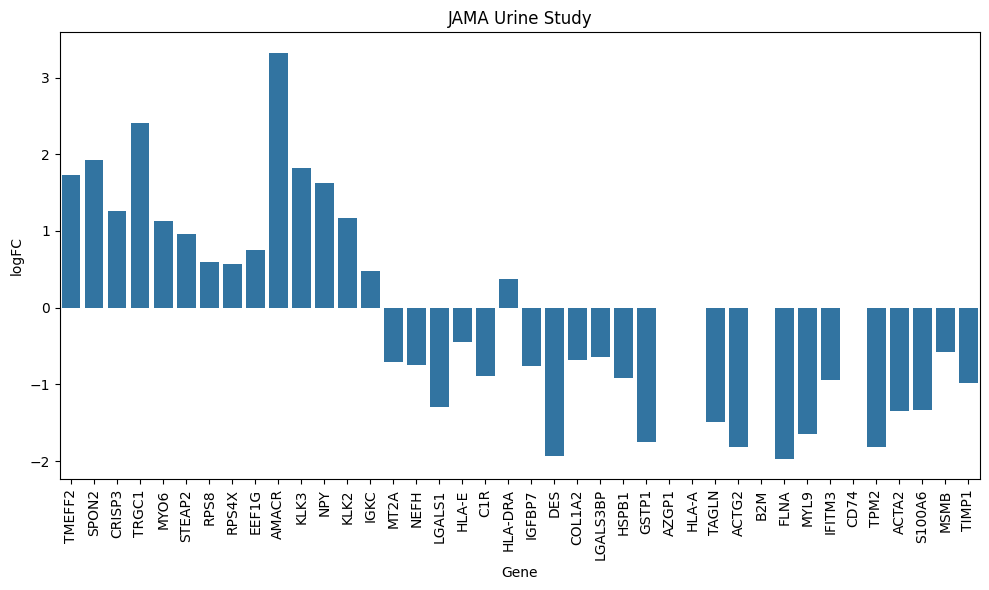

In [2]:
# Load the Excel file, skipping the first 3 rows
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
urine = pd.read_excel(data_path + 'coi240005supp2_prod_1718739236.72928.xlsx', skiprows=3, engine='openpyxl')

# Define the features list
features = [
    'TMEFF2', 'SPON2', 'CRISP3', 'TRGC1', 'MYO6', 'STEAP2', 'RPS8', 'RPS4X',
    'EEF1G', 'AMACR', 'KLK3', 'NPY', 'KLK2', 'IGKC', 'MT2A', 'NEFH',
    'LGALS1', 'HLA-E', 'C1R', 'HLA-DRA', 'IGFBP7', 'DES', 'COL1A2',
    'LGALS3BP', 'HSPB1', 'GSTP1', 'AZGP1', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M',
    'FLNA', 'MYL9', 'IFITM3', 'CD74', 'TPM2', 'ACTA2', 'S100A6', 'MSMB',
    'TIMP1'
]

# Filter rows where 'Gene Name' is in the features list
urine = urine[urine['Gene Name'].isin(features)]

# Convert relevant columns to numeric
urine['Differential Expression (Cancer vs Normal) - logFC'] = pd.to_numeric(urine['Differential Expression (Cancer vs Normal) - logFC'], errors='coerce')
urine['Differential Expression (Cancer vs Normal) - adj P.Val'] = pd.to_numeric(urine['Differential Expression (Cancer vs Normal) - adj P.Val'], errors='coerce')

# Filter rows with adjusted p-value < 0.05
urine = urine[urine['Differential Expression (Cancer vs Normal) - adj P.Val'] < 0.05]

# Set the order of the 'Gene Name' factor to match the features list
urine['Gene Name'] = pd.Categorical(urine['Gene Name'], categories=features, ordered=True)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=urine, x='Gene Name', y='Differential Expression (Cancer vs Normal) - logFC', order=features)
plt.title("JAMA Urine Study")
plt.xlabel("Gene")
plt.ylabel("logFC")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


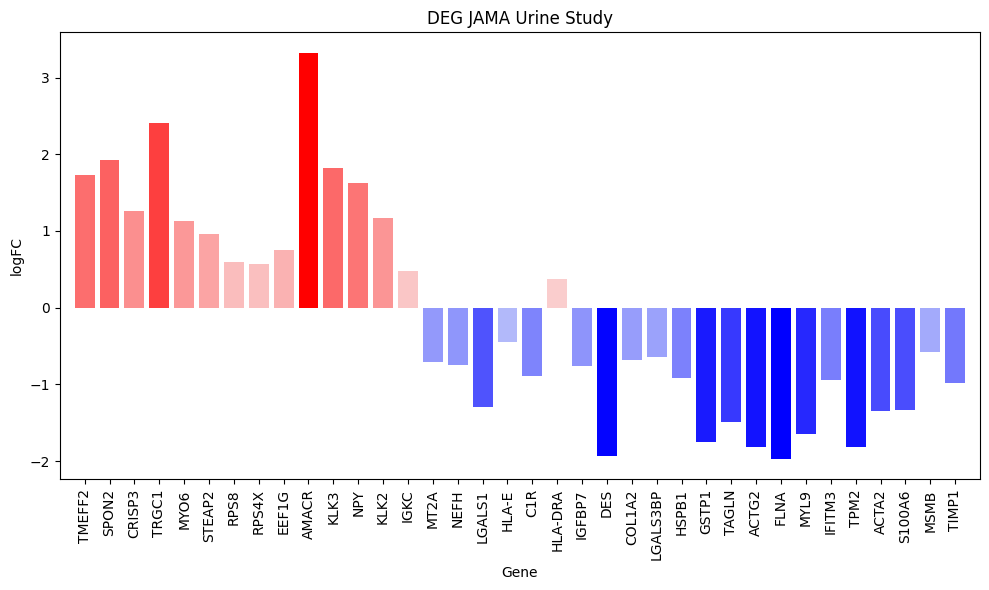

In [3]:
# Load the Excel file, skipping the first 3 rows
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
urine = pd.read_excel(data_path + 'coi240005supp2_prod_1718739236.72928.xlsx', skiprows=3, engine='openpyxl')

# Define the features list
features = [
    'TMEFF2', 'SPON2', 'CRISP3', 'TRGC1', 'MYO6', 'STEAP2', 'RPS8', 'RPS4X',
    'EEF1G', 'AMACR', 'KLK3', 'NPY', 'KLK2', 'IGKC', 'MT2A', 'NEFH',
    'LGALS1', 'HLA-E', 'C1R', 'HLA-DRA', 'IGFBP7', 'DES', 'COL1A2',
    'LGALS3BP', 'HSPB1', 'GSTP1', 'AZGP1', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M',
    'FLNA', 'MYL9', 'IFITM3', 'CD74', 'TPM2', 'ACTA2', 'S100A6', 'MSMB',
    'TIMP1'
]

# Filter rows where 'Gene Name' is in the features list
urine = urine[urine['Gene Name'].isin(features)]

# Convert relevant columns to numeric
urine['Differential Expression (Cancer vs Normal) - logFC'] = pd.to_numeric(urine['Differential Expression (Cancer vs Normal) - logFC'], errors='coerce')
urine['Differential Expression (Cancer vs Normal) - adj P.Val'] = pd.to_numeric(urine['Differential Expression (Cancer vs Normal) - adj P.Val'], errors='coerce')

# Filter rows with adjusted p-value < 0.05
urine = urine[urine['Differential Expression (Cancer vs Normal) - adj P.Val'] < 0.05]

# Set the order of the 'Gene Name' factor to match the features list
urine['Gene Name'] = pd.Categorical(urine['Gene Name'], categories=features, ordered=True)
urine = urine.sort_values('Gene Name')  # Sort based on the ordered categorical variable


# Separate positive and negative logFC values for color mapping
logFC = urine['Differential Expression (Cancer vs Normal) - logFC']
max_logFC = logFC[logFC > 0].max()
min_logFC = logFC[logFC < 0].min()

# Define color maps for positive (white to red) and negative (white to blue) values
pos_cmap = LinearSegmentedColormap.from_list("pos_cmap", ["#f9e6e6", "red"])
neg_cmap = LinearSegmentedColormap.from_list("neg_cmap", ["blue", "#e6f0f9"])

# Normalize values for each color map
norm_pos = Normalize(vmin=0, vmax=max_logFC)
norm_neg = Normalize(vmin=min_logFC, vmax=0)

# Create bar colors based on logFC values
colors = [
    pos_cmap(norm_pos(val)) if val > 0 else neg_cmap(norm_neg(val))
    for val in logFC
]

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(urine['Gene Name'], logFC, color=colors)
plt.title("DEG JAMA Urine Study")
plt.xlabel("Gene")
plt.ylabel("logFC")
plt.xticks(rotation=90)
plt.xlim(-1, urine.shape[0])
plt.tight_layout()
plt.savefig('JAMA_DEG_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

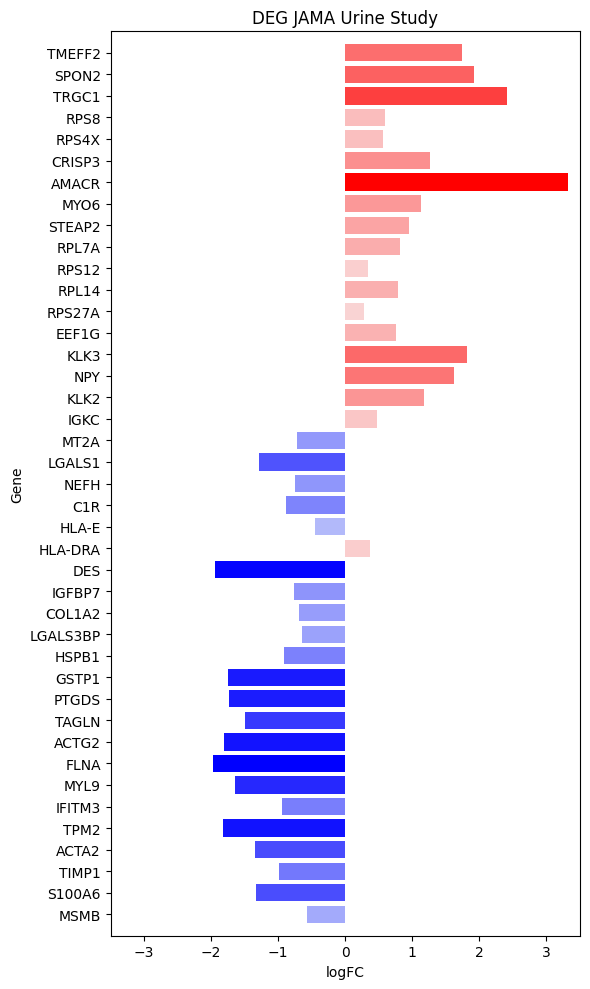

In [4]:
# Load the Excel file, skipping the first 3 rows
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
urine = pd.read_excel(data_path + 'coi240005supp2_prod_1718739236.72928.xlsx', skiprows=3, engine='openpyxl')

# Define the features list
features = [
    'TMEFF2', 'SPON2', 'TRGC1', 'RPS8', 'RPS4X', 'CRISP3', 'AMACR', 'MYO6',
              'STEAP2', 'RPL7A', 'RPS12', 'RPL14', 'RPS27A', 'EEF1G', 'KLK3', 'NPY',
              'KLK2', 'IGKC', 'MT2A', 'LGALS1', 'NEFH', 'C1R', 'HLA-E', 'HLA-DRA',
              'DES', 'IGFBP7', 'COL1A2', 'LGALS3BP', 'HSPB1', 'AZGP1', 'GSTP1',
              'PTGDS', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M', 'FLNA', 'MYL9', 'IFITM3',
              'CD74', 'TPM2', 'ACTA2', 'TIMP1', 'S100A6', 'MSMB'
]

# Filter rows where 'Gene Name' is in the features list
urine = urine[urine['Gene Name'].isin(features)]

# Convert relevant columns to numeric
urine['Differential Expression (Cancer vs Normal) - logFC'] = pd.to_numeric(urine['Differential Expression (Cancer vs Normal) - logFC'], errors='coerce')
urine['Differential Expression (Cancer vs Normal) - adj P.Val'] = pd.to_numeric(urine['Differential Expression (Cancer vs Normal) - adj P.Val'], errors='coerce')

# Filter rows with adjusted p-value < 0.05
urine = urine[urine['Differential Expression (Cancer vs Normal) - adj P.Val'] < 0.05]

# Set the order of the 'Gene Name' factor to match the features list
urine['Gene Name'] = pd.Categorical(urine['Gene Name'], categories=list(reversed(features)), ordered=True)
urine = urine.sort_values('Gene Name')  # Sort based on the ordered categorical variable


# Separate positive and negative logFC values for color mapping
logFC = urine['Differential Expression (Cancer vs Normal) - logFC']
max_logFC = logFC[logFC > 0].max()
min_logFC = logFC[logFC < 0].min()

# Define color maps for positive (white to red) and negative (white to blue) values
pos_cmap = LinearSegmentedColormap.from_list("pos_cmap", ["#f9e6e6", "red"])
neg_cmap = LinearSegmentedColormap.from_list("neg_cmap", ["blue", "#e6f0f9"])

# Normalize values for each color map
norm_pos = Normalize(vmin=0, vmax=max_logFC)
norm_neg = Normalize(vmin=min_logFC, vmax=0)

# Create bar colors based on logFC values
colors = [
    pos_cmap(norm_pos(val)) if val > 0 else neg_cmap(norm_neg(val))
    for val in logFC
]

# Plot the results
#plt.figure(figsize=(10, 6))
#bars = plt.bar(urine['Gene Name'], logFC, color=colors)
plt.figure(figsize=(6, 10))
bars = plt.barh(urine['Gene Name'], logFC, color=colors)
plt.title("DEG JAMA Urine Study")
plt.xlabel("logFC")
plt.ylabel("Gene")
plt.ylim(-1, urine.shape[0])
plt.xlim(-3.50, 3.50)
#plt.xlim(-1, urine.shape[0])
plt.tight_layout()
plt.savefig('JAMA_DEG.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
urine.shape

(41, 26)

# Prostate RNA

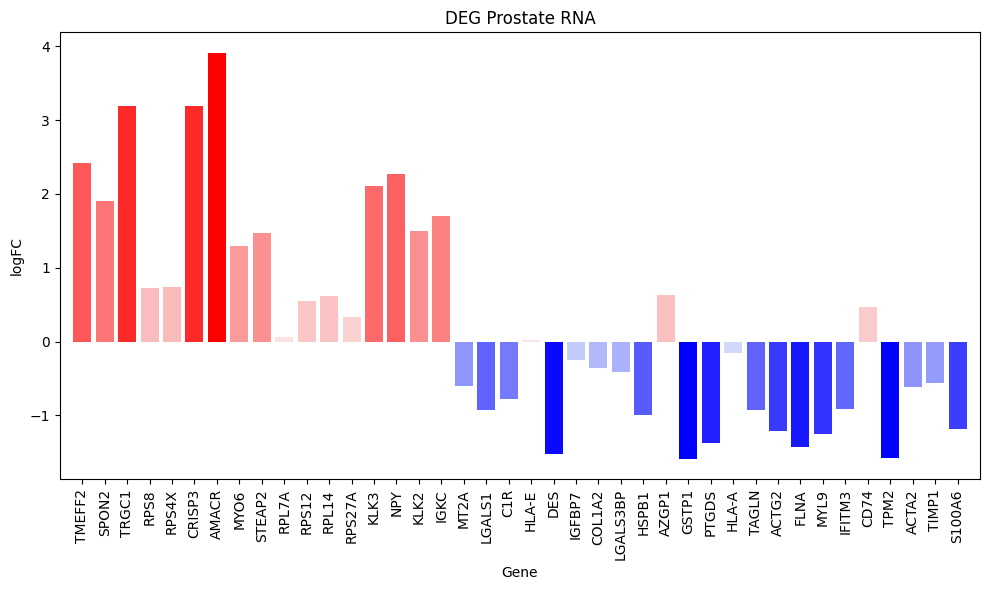

In [6]:
# Load the Excel file, skipping the first 3 rows
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
features = ['TMEFF2', 'SPON2', 'TRGC1', 'RPS8', 'RPS4X', 'CRISP3', 'AMACR', 'MYO6',
              'STEAP2', 'RPL7A', 'RPS12', 'RPL14', 'RPS27A', 'EEF1G', 'KLK3', 'NPY',
              'KLK2', 'IGKC', 'MT2A', 'LGALS1', 'NEFH', 'C1R', 'HLA-E', 'HLA-DRA',
              'DES', 'IGFBP7', 'COL1A2', 'LGALS3BP', 'HSPB1', 'AZGP1', 'GSTP1',
              'PTGDS', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M', 'FLNA', 'MYL9', 'IFITM3',
              'CD74', 'TPM2', 'ACTA2', 'TIMP1', 'S100A6', 'MSMB']

prostateRNA = pd.read_csv(data_path + 'significant_genes_ProstateRNA.csv')
prostateRNA["Gene"] = prostateRNA['Gene'].str.replace('.', '-', regex=False)
prostateRNA.index = prostateRNA["Gene"].values

# Set the order of the 'Gene Name' factor to match the features list
prostateRNA['Gene'] = pd.Categorical(prostateRNA['Gene'], categories=features, ordered=True)
prostateRNA = prostateRNA.sort_values('Gene')  # Sort based on the ordered categorical variable

# Separate positive and negative logFC values for color mapping
logFC = prostateRNA['logFC']
max_logFC = logFC[logFC > 0].max()
min_logFC = logFC[logFC < 0].min()

# Define color maps for positive (white to red) and negative (white to blue) values
pos_cmap = LinearSegmentedColormap.from_list("pos_cmap", ["#f9e6e6", "red"])
neg_cmap = LinearSegmentedColormap.from_list("neg_cmap", ["blue", "#e6f0f9"])

# Normalize values for each color map
norm_pos = Normalize(vmin=0, vmax=max_logFC)
norm_neg = Normalize(vmin=min_logFC, vmax=0)

# Create bar colors based on logFC values
colors = [
    pos_cmap(norm_pos(val)) if val > 0 else neg_cmap(norm_neg(val))
    for val in logFC
]

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(prostateRNA['Gene'], logFC, color=colors)
plt.title("DEG Prostate RNA")
plt.xlabel("Gene")
plt.ylabel("logFC")
plt.xticks(rotation=90)
plt.xlim(-1, prostateRNA.shape[0])
plt.tight_layout()
plt.savefig('ProstateRNA_DEG_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()


In [7]:
prostateRNA

,Gene,logFC,p.value,adj.p.value
TMEFF2,TMEFF2,2.424449,2.470144e-35,1.111565e-34
SPON2,SPON2,1.902031,2.359627e-37,1.327290e-36
TRGC1,TRGC1,3.186097,1.646631e-45,1.852460e-44
RPS8,RPS8,0.719073,2.560413e-45,2.304371e-44
RPS4X,RPS4X,0.742718,4.508118e-19,1.014327e-18
CRISP3,CRISP3,3.190230,1.854205e-33,6.953267e-33
AMACR,AMACR,3.912108,5.910236e-164,2.659606e-162
MYO6,MYO6,1.289137,3.998265e-68,5.997398e-67
STEAP2,STEAP2,1.466407,1.011110e-32,3.499997e-32
RPL7A,RPL7A,0.064058,5.350035e-07,6.878617e-07


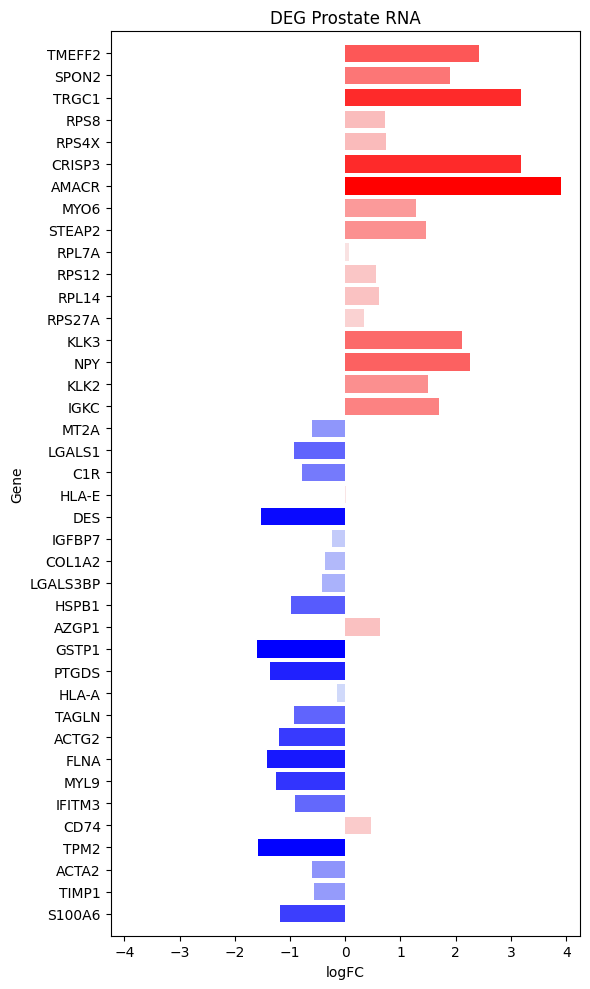

In [8]:
# Load the Excel file, skipping the first 3 rows
data_path = 'C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/'
features = [
    'TMEFF2', 'SPON2', 'TRGC1', 'RPS8', 'RPS4X', 'CRISP3', 'AMACR', 'MYO6',
              'STEAP2', 'RPL7A', 'RPS12', 'RPL14', 'RPS27A', 'EEF1G', 'KLK3', 'NPY',
              'KLK2', 'IGKC', 'MT2A', 'LGALS1', 'NEFH', 'C1R', 'HLA-E', 'HLA-DRA',
              'DES', 'IGFBP7', 'COL1A2', 'LGALS3BP', 'HSPB1', 'AZGP1', 'GSTP1',
              'PTGDS', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M', 'FLNA', 'MYL9', 'IFITM3',
              'CD74', 'TPM2', 'ACTA2', 'TIMP1', 'S100A6', 'MSMB'
]

prostateRNA = pd.read_csv(data_path + 'significant_genes_ProstateRNA.csv')
prostateRNA["Gene"] = prostateRNA['Gene'].str.replace('.', '-', regex=False)
prostateRNA.index = prostateRNA["Gene"].values

# Set the order of the 'Gene Name' factor to match the features list
prostateRNA['Gene'] = pd.Categorical(prostateRNA['Gene'], categories=list(reversed(features)), ordered=True)
prostateRNA = prostateRNA.sort_values('Gene')  # Sort based on the ordered categorical variable

# Separate positive and negative logFC values for color mapping
logFC = prostateRNA['logFC']
max_logFC = logFC[logFC > 0].max()
min_logFC = logFC[logFC < 0].min()

# Define color maps for positive (white to red) and negative (white to blue) values
pos_cmap = LinearSegmentedColormap.from_list("pos_cmap", ["#f9e6e6", "red"])
neg_cmap = LinearSegmentedColormap.from_list("neg_cmap", ["blue", "#e6f0f9"])

# Normalize values for each color map
norm_pos = Normalize(vmin=0, vmax=max_logFC)
norm_neg = Normalize(vmin=min_logFC, vmax=0)

# Create bar colors based on logFC values
colors = [
    pos_cmap(norm_pos(val)) if val > 0 else neg_cmap(norm_neg(val))
    for val in logFC
]

# Plot the results
plt.figure(figsize=(6, 10))
bars = plt.barh(prostateRNA['Gene'], logFC, color=colors)
plt.title("DEG Prostate RNA")
plt.xlabel("logFC")
plt.ylabel("Gene")
plt.ylim(-1, prostateRNA.shape[0])
plt.xlim(-4.25, 4.25)
plt.tight_layout()
plt.savefig('ProstateRNA_DEG.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
prostateRNA.shape

(40, 4)

# Prediction Models

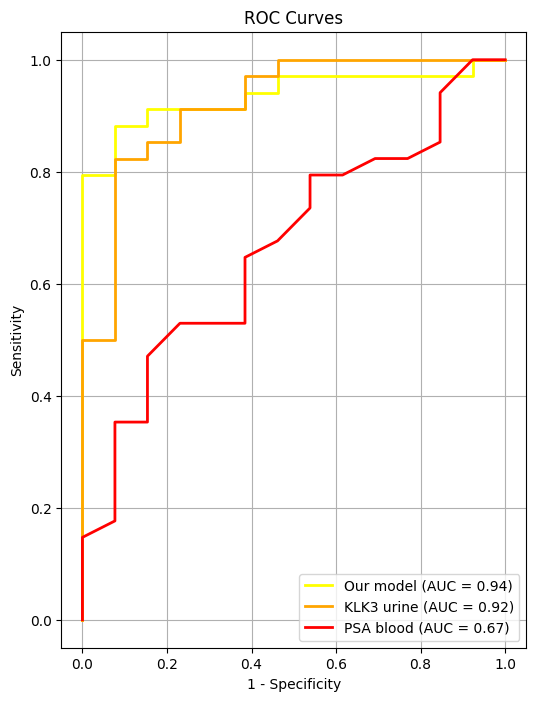

In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data_path = "C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/"
y_data = pd.read_csv(data_path + "y_test.csv", index_col = 0)
predicted_prob_data = pd.read_csv(data_path + "predicted_prob.csv", index_col = 0)
PSA_data = pd.read_csv(data_path + "PSA_predicted_prob.csv", index_col = 0)
KLK3_data = pd.read_csv(data_path + "KLK3_predicted_prob.csv", index_col = 0)

fpr, tpr, thresholds = roc_curve(y_data, predicted_prob_data)
fpr_PSA, tpr_PSA, thresholds_PSA = roc_curve(y_data, PSA_data)
fpr_KLK3, tpr_KLK3, thresholds_KLK3 = roc_curve(y_data, KLK3_data)

# Step 6: Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
roc_auc_PSA = auc(fpr_PSA, tpr_PSA)
roc_auc_KLK3 = auc(fpr_KLK3, tpr_KLK3)

# Step 7: Plot the ROC curve
plt.figure(figsize=(6, 8))
plt.plot(fpr, tpr, color='yellow', lw=2, label='Our model (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_KLK3, tpr_KLK3, color='orange', lw=2, label='KLK3 urine (AUC = {:.2f})'.format(roc_auc_KLK3))
plt.plot(fpr_PSA, tpr_PSA, color='red', lw=2, label='PSA blood (AUC = {:.2f})'.format(roc_auc_PSA))

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

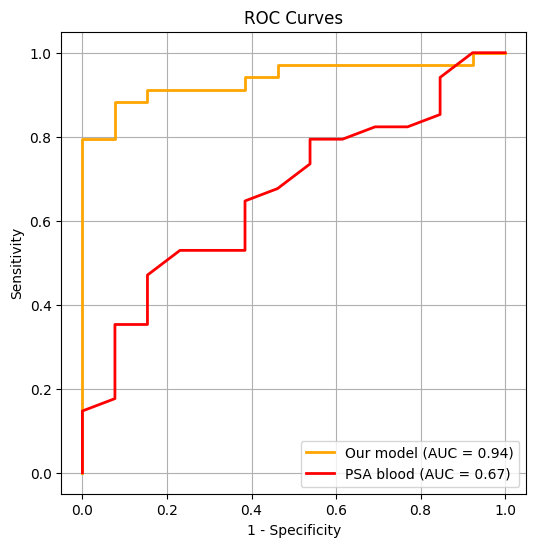

In [29]:
# Plot without legend
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='Our model (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_PSA, tpr_PSA, color='red', lw=2, label='PSA blood (AUC = {:.2f})'.format(roc_auc_PSA))

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('Comparison_Models.png', dpi=300, bbox_inches='tight')
plt.show()

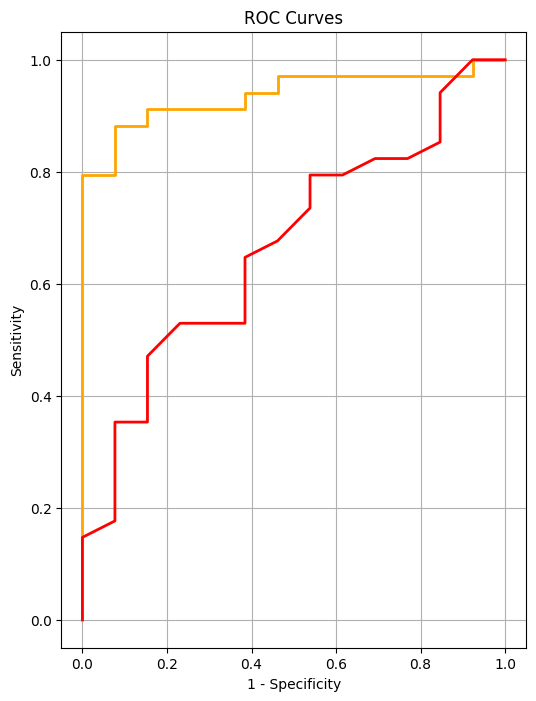

In [30]:
# Plot without legend
plt.figure(figsize=(6, 8))
plt.plot(fpr, tpr, color='orange', lw=2, label='Our model (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_PSA, tpr_PSA, color='red', lw=2, label='PSA (AUC = {:.2f})'.format(roc_auc_PSA))

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.grid(True)
plt.savefig('Comparison_Models_nolegend.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplots Grade

In [44]:
ev_measures = pd.read_csv(data_path + "EvaluationMeasures_grade.csv", index_col = 0).loc["OurModel",:]
ev_measures

r_squared     0.269541
model_rmse    1.483788
pred_corr     0.591823
Name: OurModel, dtype: float64

C:\Users\dandia\AppData\Local\Temp\ipykernel_28624\3984720375.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TrueGrade', y='PredictedProb', data=our_model,palette = color_map, order = grades)


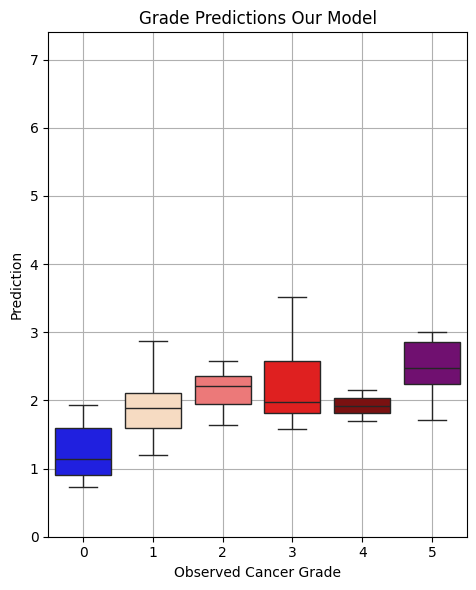

In [25]:
data_path = "C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/"
our_model = pd.read_csv(data_path + "Our_model_grade.csv", index_col = 0)
ev_measures = pd.read_csv(data_path + "EvaluationMeasures_grade.csv", index_col = 0).loc["OurModel",:]
color_map = {
    '0': 'blue',  # Replace with your actual category name and colors
    '1': 'peachpuff',
    '2': '#FF6666',
    '3': 'red',
    '4': 'darkred',
    '5': 'purple'
}

grades = [0,1,2,3,4,5]
plt.figure(figsize=(5, 6))
sns.boxplot(x='TrueGrade', y='PredictedProb', data=our_model,palette = color_map, order = grades)

# Customize the plot
plt.title( 'Grade Predictions Our Model')
plt.xlabel('Observed Cancer Grade')
plt.ylabel('Prediction')
plt.tight_layout()
plt.grid(True)
plt.ylim(0,7.4)

plt.savefig("Grade_Predictions_Our_Model.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\dandia\AppData\Local\Temp\ipykernel_28624\852205053.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TrueGrade', y='PredictedProb', data=our_model,palette = color_map, order = grades)


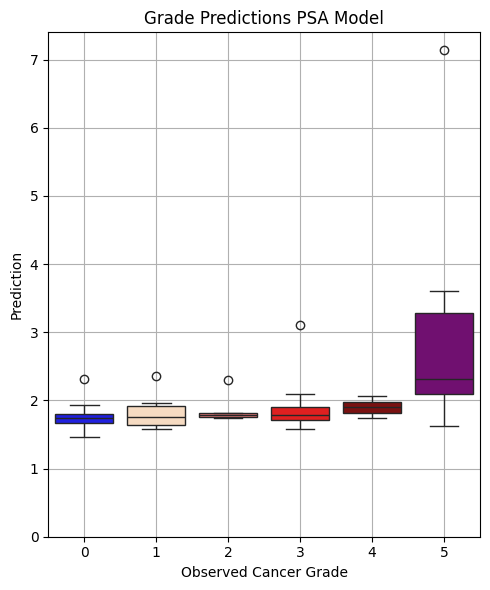

In [23]:
data_path = "C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/"
our_model = pd.read_csv(data_path + "PSA_grade.csv", index_col = 0)
color_map = {
    '0': 'blue',  # Replace with your actual category name and colors
    '1': 'peachpuff',
    '2': '#FF6666',
    '3': 'red',
    '4': 'darkred',
    '5': 'purple'
}

grades = [0,1,2,3,4,5]
plt.figure(figsize=(5, 6))
sns.boxplot(x='TrueGrade', y='PredictedProb', data=our_model,palette = color_map, order = grades)

# Customize the plot
plt.title( 'Grade Predictions PSA Model')
plt.xlabel('Observed Cancer Grade')
plt.ylabel('Prediction')
plt.tight_layout()
plt.grid(True)
plt.ylim(0,7.4)

plt.savefig("Grade_Predictions_PSA_Model.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

C:\Users\dandia\AppData\Local\Temp\ipykernel_28624\3897680177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TrueGrade', y='PredictedProb', data=our_model,palette = color_map, order = grades)


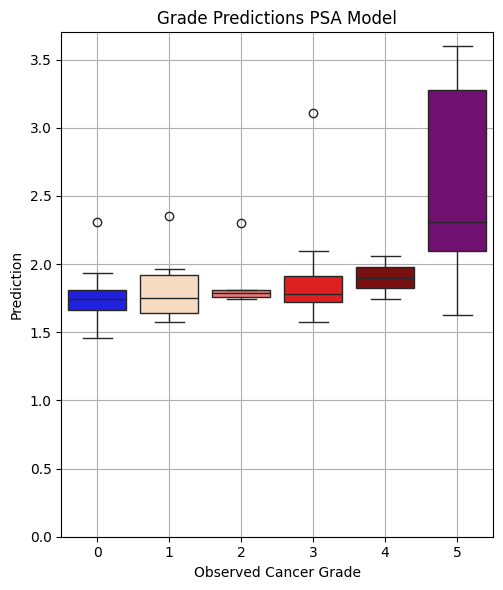

In [24]:
plt.figure(figsize=(5, 6))
sns.boxplot(x='TrueGrade', y='PredictedProb', data=our_model,palette = color_map, order = grades)

# Customize the plot
plt.title( 'Grade Predictions PSA Model')
plt.xlabel('Observed Cancer Grade')
plt.ylabel('Prediction')
plt.tight_layout()
plt.grid(True)
#plt.savefig("Grade_Predictions_PSA_Model.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.ylim(0,3.7)
plt.show()

# UKBB

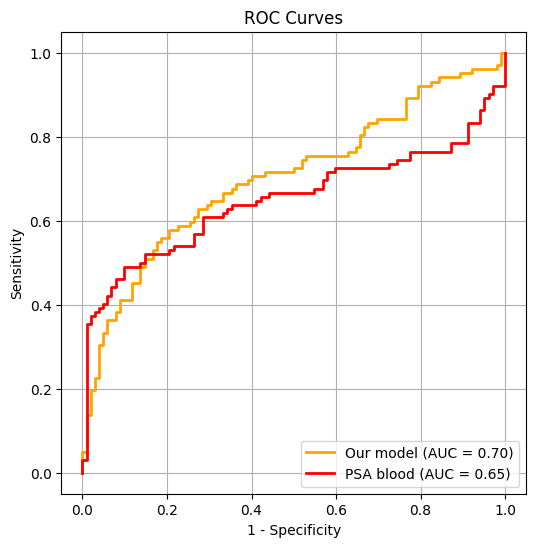

In [42]:
data_path = "C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/DATA/"
y_data = pd.read_csv(data_path + "UKBB_y_test.csv", index_col = 0)
predicted_prob_data = pd.read_csv(data_path + "UKBB_predicted_prob.csv", index_col = 0)
KLK3_data = pd.read_csv(data_path + "UKBB_KLK3_predicted_prob.csv", index_col = 0)

fpr, tpr, thresholds = roc_curve(y_data, predicted_prob_data)
fpr_PSA, tpr_PSA, thresholds_PSA = roc_curve(y_data, KLK3_data)

# Step 6: Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
roc_auc_PSA = auc(fpr_PSA, tpr_PSA)

# Step 7: Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='Our model (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr_PSA, tpr_PSA, color='red', lw=2, label='PSA blood (AUC = {:.2f})'.format(roc_auc_PSA))

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('UKBB_Comparison_Models.png', dpi=300, bbox_inches='tight')
plt.show()

# scRNA Data

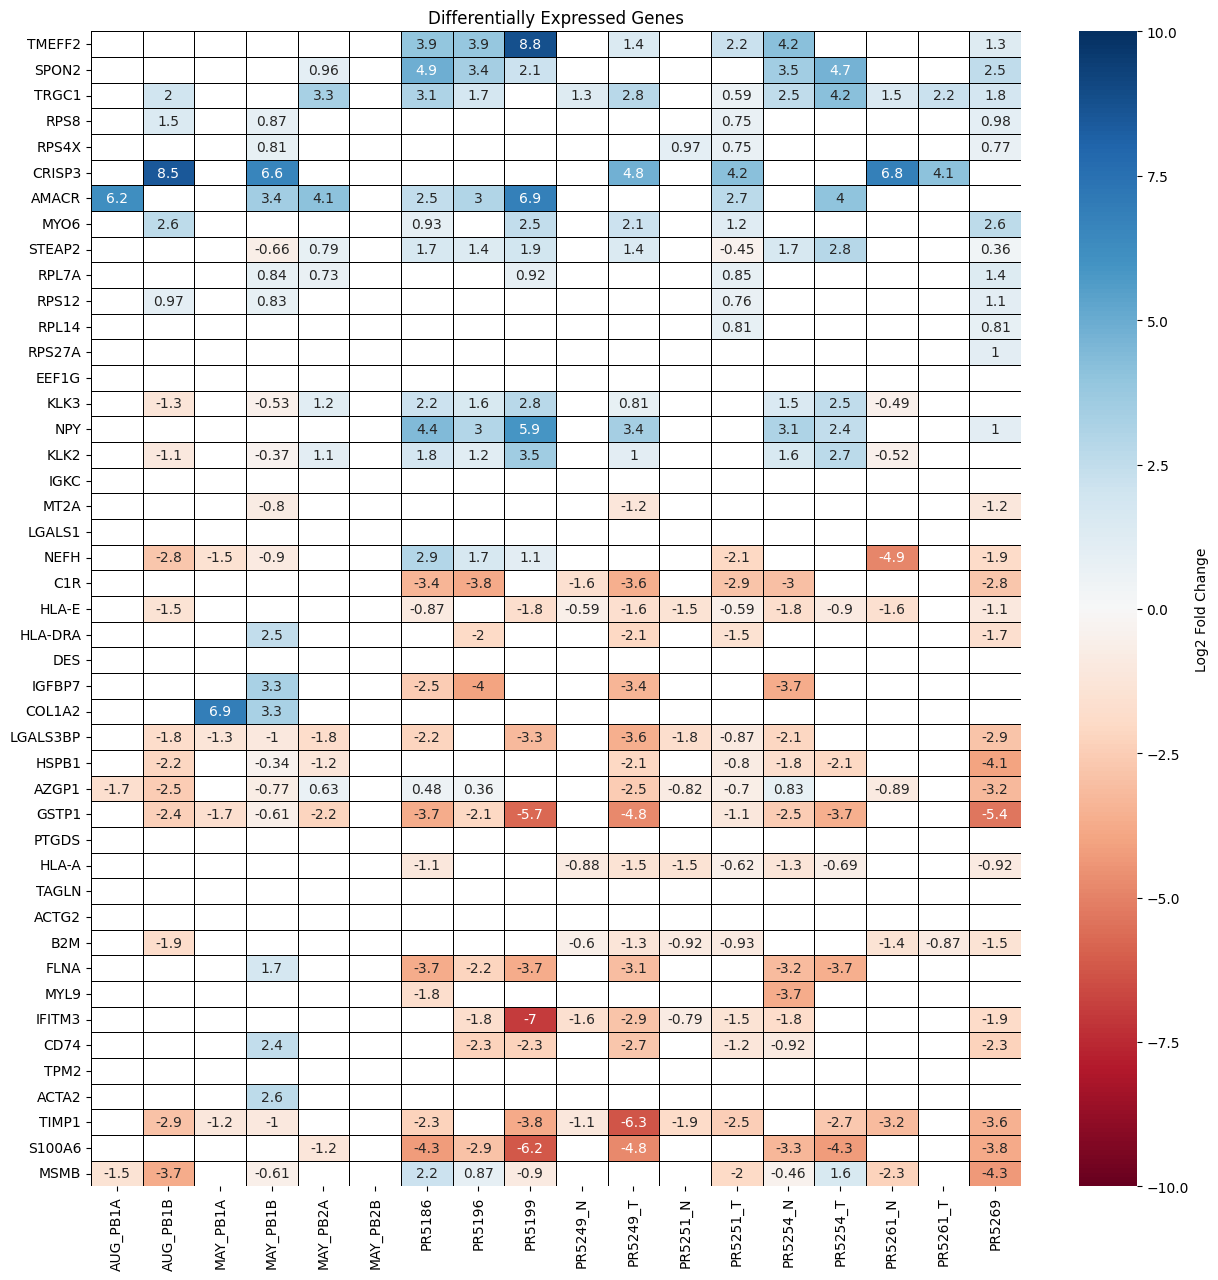

In [21]:
data = pd.read_csv('C:/Users/dandia/OneDrive - Karolinska Institutet/Documents/Github/Spatial_CCC/R/InterestingFoldChanges2.csv', index_col = 0)
df_wide = data.pivot(index='gene', columns='variable', values='value').reset_index()
df_wide.index = df_wide["gene"].values
df_wide = df_wide.drop(columns='gene')

features = ['TMEFF2', 'SPON2', 'TRGC1', 'RPS8', 'RPS4X', 'CRISP3', 'AMACR', 'MYO6',
       'STEAP2', 'RPL7A', 'RPS12', 'RPL14', 'RPS27A', 'EEF1G', 'KLK3', 'NPY',
       'KLK2', 'IGKC', 'MT2A', 'LGALS1', 'NEFH', 'C1R', 'HLA-E', 'HLA-DRA',
       'DES', 'IGFBP7', 'COL1A2', 'LGALS3BP', 'HSPB1', 'AZGP1', 'GSTP1',
       'PTGDS', 'HLA-A', 'TAGLN', 'ACTG2', 'B2M', 'FLNA', 'MYL9', 'IFITM3',
       'CD74', 'TPM2', 'ACTA2', 'TIMP1', 'S100A6', 'MSMB']
new_df = pd.DataFrame(index=features)
merged_df = pd.merge(new_df, df_wide, left_index=True, right_index=True, how='outer')
merged_df = merged_df.reindex(new_df.index)
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(merged_df, cmap="RdBu", annot=True, linewidths=0.5, vmin=-10, vmax=10, linecolor='black', cbar_kws={'label': 'Log2 Fold Change'})
plt.title("Differentially Expressed Genes")
plt.savefig("scRNA_DEG.png", dpi=300, bbox_inches='tight')
plt.show()